**Data Analytics**
------
## Community Detection Lab
### 4-4-22
------
The tutorial is adapted from: https://github.com/vtraag/4TU-CSS

Credits: Matteo Mistri

## Import packages

In [1]:
!sudo apt install build-essential python-dev libxml2 libxml2-dev zlib1g-dev
!sudo pip install cairocffi
!pip install python-igraph

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-dev is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  python2-dev python2 python-dev-is-python3

E: Package 'python-dev' has no installation candidate
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.7 MB/s eta 0:00:00


In [2]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import string

Let's load a visualize the *Zachary* network.

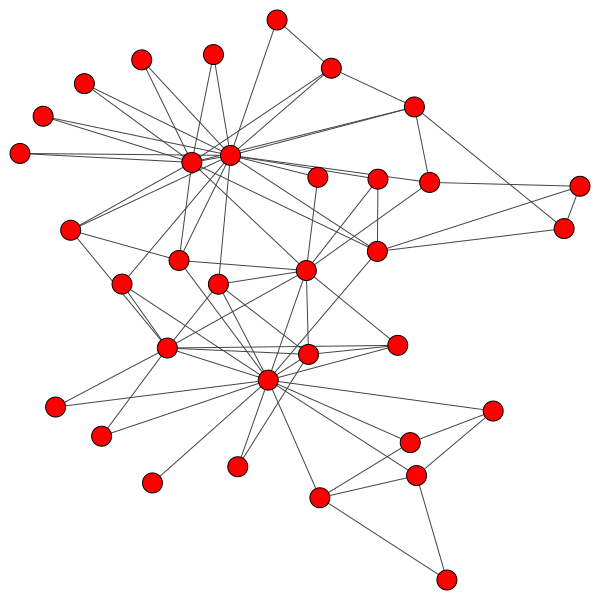

In [ ]:
G = ig.Graph.Famous('Zachary')
layout = G.layout("kk")
#layout = G.layout("circular")
#layout = G.layout("tree")
ig.plot(G,layout = layout)

In [ ]:
ig.summary(G)

IGRAPH U--- 34 78 -- 


How do you include a color gradient related to the node degree?
Nodes with higher degree closer to blue, nodes with lower degree closer to white

In [ ]:
#https://igraph.org/python/api/develop/igraph.drawing.colors.GradientPalette.html
pal = ig.GradientPalette("white", "blue", max(G.degree()))

for el in pal:
  print(pal[el])

(1.0, 1.0, 1.0, 1.0)
(0.9375, 0.9375, 1.0, 1.0)
(0.875, 0.875, 1.0, 1.0)
(0.8125, 0.8125, 1.0, 1.0)
(0.75, 0.75, 1.0, 1.0)
(0.6875, 0.6875, 1.0, 1.0)
(0.625, 0.625, 1.0, 1.0)
(0.5625, 0.5625, 1.0, 1.0)
(0.5, 0.5, 1.0, 1.0)
(0.4375, 0.4375, 1.0, 1.0)
(0.375, 0.375, 1.0, 1.0)
(0.3125, 0.3125, 1.0, 1.0)
(0.25, 0.25, 1.0, 1.0)
(0.1875, 0.1875, 1.0, 1.0)
(0.125, 0.125, 1.0, 1.0)
(0.0625, 0.0625, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)


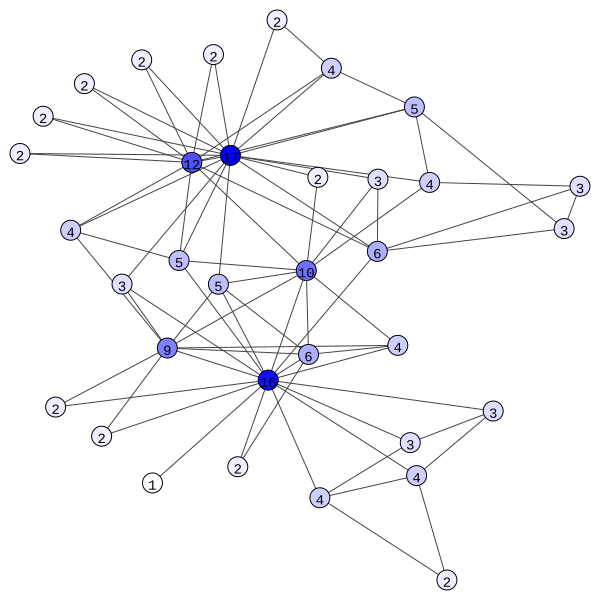

In [ ]:
G.vs["label"] = G.degree()
G.vs["color"] = [pal[i-1] for i in G.degree()]
ig.plot(G, layout=layout)

In [ ]:
#How do you create an induced subgraph with only the nodes with degree > 5?
# FONDAMENTALE sono i colori per far capire subito all'utente

In [ ]:
hub_vs = [G.vs.indices[i] for i in G.vs.indices if G.vs.degree()[i] >= 5]
print(hub_vs)

[0, 1, 2, 3, 8, 13, 23, 31, 32, 33]


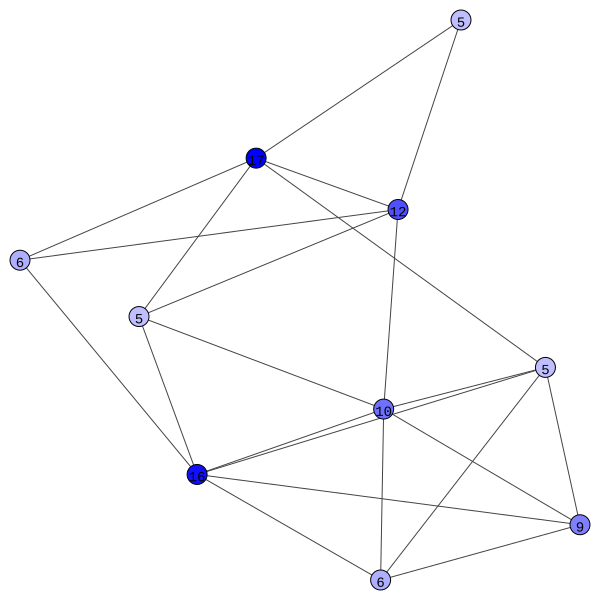

In [ ]:
hub_subgraph = G.induced_subgraph(hub_vs)
ig.plot(hub_subgraph)

In [ ]:
#What happens if we want to extract the induced subgraph of nodes with degree <5?
#what can we expect? Nodi singoli, e sopratutto devo starci attento per operazioni successive
#nodi che hanno avuto meno conversazioni -> assortatività e dissasortatività

[4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30]


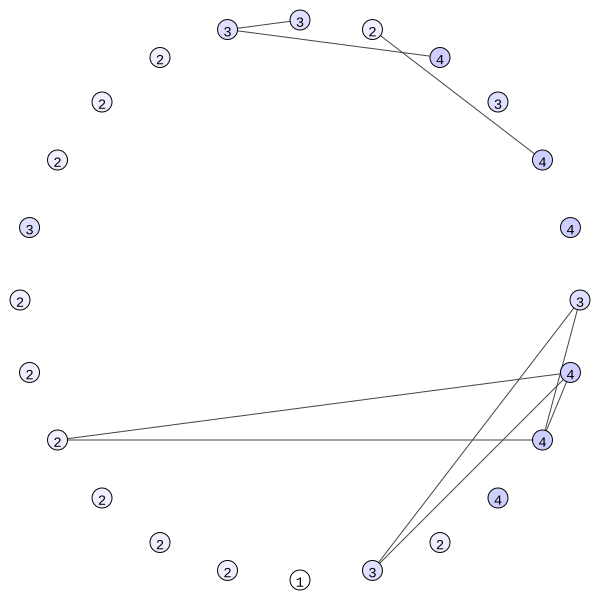

In [ ]:
#@title
hub_vs = [G.vs.indices[i] for i in G.vs.indices if G.vs.degree()[i] < 5]
print(hub_vs)
hub_subgraph = G.induced_subgraph(hub_vs)
#ig.plot(hub_subgraph,layout = 'kk')
ig.plot(hub_subgraph,layout = 'circular')
#ig.plot(hub_subgraph,layout = 'tree')

# Assortative mixing

Assortativity, or assortative mixing is a **preference for a network's nodes to attach to others that are similar in some way**.

Though the specific measure of similarity may vary, network theorists often examine assortativity in terms of a **node's degree.**

In [ ]:
G.assortativity_degree()

-0.47561309768461435

In [ ]:
#what this value tells us about the network structural properties?

In [ ]:
#let's load the networks of the last lab

In [ ]:
dolphinEdges = pd.read_csv("dolphin_edges.csv",header=None)
reader = csv.reader(open("dolphin_edges.csv"))
G_dolphins = ig.Graph.TupleList(reader)
G_dolphins.summary()
print(G_dolphins)

IGRAPH UN-- 62 159 --
+ attr: name (v)
+ edges (vertex names):
        CCL -- Double, Grin, Zap
     Double -- CCL, Kringel, Oscar, SN4, Topless, Zap
       DN16 -- Feather, Gallatin, Wave, Web
    Feather -- DN16, DN21, Gallatin, Jet, Ripplefluke, SN90, Web
       DN21 -- Feather, Gallatin, Jet, Upbang, Wave, Web
       Beak -- Fish, Grin, Haecksel, SN9, SN96, TR77
       Fish -- Beak, Bumper, Patchback, SN96, TR77
     Bumper -- Fish, SN96, Thumper, Zipfel
   Gallatin -- DN16, Feather, DN21, Jet, Ripplefluke, SN90, Upbang, Web
       Grin -- CCL, Beak, Hook, MN83, Scabs, Shmuddel, SN4, SN63, SN9,
Stripes, TR99, TSN103
   Haecksel -- Beak, Jonah, MN83, SN9, Topless, Vau, Zap
       Hook -- Grin, Kringel, Scabs, SN4, SN63, TR99
 Beescratch -- Jet, Knit, Notch, Number1, Oscar, SN100, SN90, Upbang
        Jet -- Feather, DN21, Gallatin, Beescratch, MN23, Mus, Number1, Quasi,
Web
      Jonah -- Haecksel, Kringel, MN105, MN83, Patchback, Topless, Trigger
       Knit -- Beescratch, DN63, PL

In [ ]:
G_miserables = ig.Graph.Read("lesmiserables.gml", format="gml")
print(G_miserables)

IGRAPH U--- 77 254 --
+ attr: id (v), label (v), value (e)
+ edges:
 0 --  1  2  3  4  5  6  7  8  9 11
 1 --  0
 2 --  0  3 11
 3 --  0  2 11
 4 --  0
 5 --  0
 6 --  0
 7 --  0
 8 --  0
 9 --  0
10 -- 11
11 --  0  2  3 10 12 13 14 15 23 24 25 26 27 28 29 31 32 33 34 35 36 37 38 43
44 48 49 51 55 58 64 68 69 70 71 72
12 -- 11 23
13 -- 11
14 -- 11
15 -- 11
16 -- 17 18 19 20 21 22 23 26 55
17 -- 16 18 19 20 21 22 23
18 -- 16 17 19 20 21 22 23
19 -- 16 17 18 20 21 22 23
20 -- 16 17 18 19 21 22 23
21 -- 16 17 18 19 20 22 23
22 -- 16 17 18 19 20 21 23
23 -- 11 12 16 17 18 19 20 21 22 24 25 27 29 30 31
24 -- 11 23 25 26 27 41 42 50 68 69 70
25 -- 11 23 24 26 27 39 40 41 42 48 55 68 69 70 71 75
26 -- 11 16 24 25 27 43 49 51 54 55 72
27 -- 11 23 24 25 26 28 29 31 33 43 48 58 68 69 70 71 72
28 -- 11 27 44 45
29 -- 11 23 27 34 35 36 37 38
30 -- 23 31
31 -- 11 23 27 30
32 -- 11
33 -- 11 27
34 -- 11 29 35 36 37 38
35 -- 11 29 34 36 37 38
36 -- 11 29 34 35 37 38
37 -- 11 29 34 35 36 38
38 -- 11 29

In [ ]:
#let's do it again with both networks
#which intuitions can we derive from this simple analysis?
# Correctly, they are dolphins, so there are no reference points, but they don't care who the main characters are.

In [ ]:
G_dolphins.assortativity_degree()

-0.04359402821531262

In [ ]:
# It is rightly disorienting because if the characters didn't speak with secondary characters, it would be a terrible book and there would be no dialogues.
G_miserables.assortativity_degree()

-0.1652251344223694

In [ ]:
#let's try to assess the nominal assortativity with respect to classes
#defined by the first letter of the name(nominale cerco una classe, una caratteristica)
# Now we will indeed not see the degree but the letter and it will be around 0 since there is no reason for them to be disassortative.

In [ ]:
first_letter_list = []
for i in G_miserables.vs.indices:
  G_miserables.vs[i]['test_cat'] = ord(G_miserables.vs['label'][i].upper()[0]) #needs to be numeric
  first_letter_list.append(G_miserables.vs['label'][i].upper()[0]) #keeping the letter string

In [ ]:
#now we can compute the nominal assortativity

In [ ]:
G_miserables.assortativity_nominal('test_cat')

-0.021167459471636632

In [ ]:
#let's plot this in a nice way

In [ ]:
pal = ig.GradientPalette("azure", "red", 26) #defining a new palette, azzurro a rosso con 26 colori
normalized_category_for_palette = [x + 1 - min(G_miserables.vs['test_cat'])
for x in G_miserables.vs['test_cat']] #normalization needed to plot nice colors

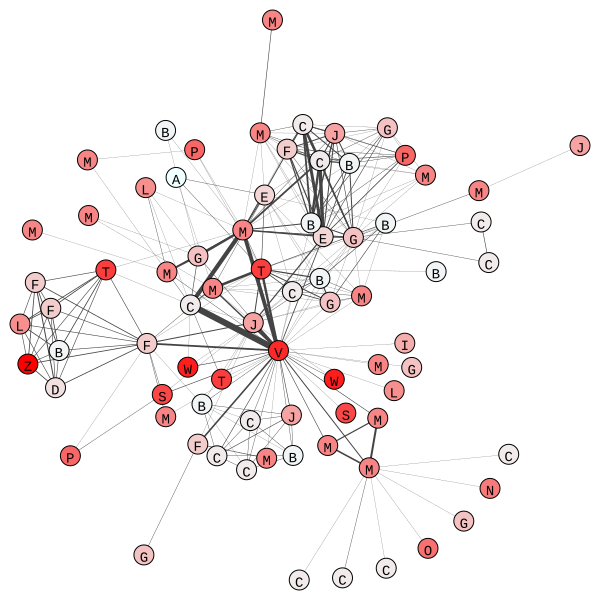

In [ ]:
# Qua inutile la nominal ma si potrebbe usare per il partito politico
# The nominal here is useless but we could use it for politcian cluster
visual_style = {}

visual_style["vertex_size"] = 20
visual_style["vertex_color"] = [pal[i-1] for i in normalized_category_for_palette]
visual_style["vertex_label"] = first_letter_list
visual_style["edge_width"] = [element/5 for element in G_miserables.es["value"]]
visual_style["layout"] = 'kk'

ig.plot(G_miserables,**visual_style)

# Community detection

A common task in network analysis is comunity detection: finding groups of nodes that are **relatively densely connected within communities, but sparsely between communities.**

It provides a sort of birds-eye view of the network, which helps in the interpretation of the network.
Communities often seem to share some characteristic or in for example biological networks, some **functions**.

Così da trovare le comunità di geni da intaccare con un particolare farmaco.


# Network centric approaches

## Modularity-Based Community Detection

The method that has been most prominent in the literature is called **modularity**.

It is based on *comparing the real network to a random network using the configuration null-model*.

The idea is that we want to find as many edges within communities compared to the expected number of such edges.

### Approach 1
This function calculates the **optimal community structure** for a graph, in terms of **maximal modularity score** (by maximizing the modularity measure over all possible partitions).

The calculation is done by transforming the modularity maximization into an **integer programming problem**, and then calling a solver.

Note that modularity optimization is an **NP-complete problem**, and all known algorithms for it have exponential time complexity.

In [ ]:
partition_optimal = G.community_optimal_modularity()

In [ ]:
partition_optimal

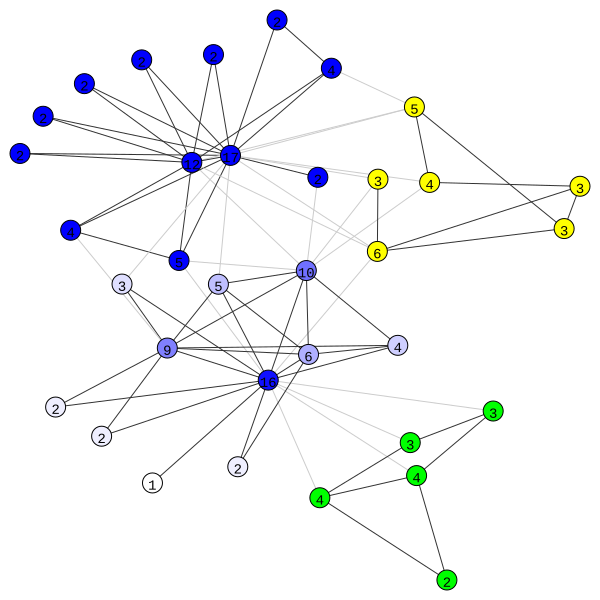

In [ ]:
# It remains the color of the start procedure, we need to reset the color for the graph
ig.plot(partition_optimal)

In [ ]:
#problem with colors, so?

In [ ]:
G.vs['color'] = 'red' #let's "reset" the colors

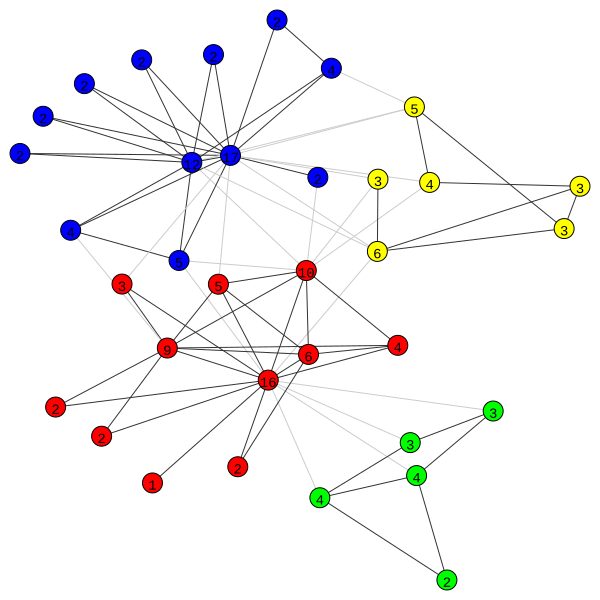

In [ ]:
#trova la struttura che massimizza
ig.plot(partition_optimal)

In [ ]:
#how do we isolate the distinct communities?

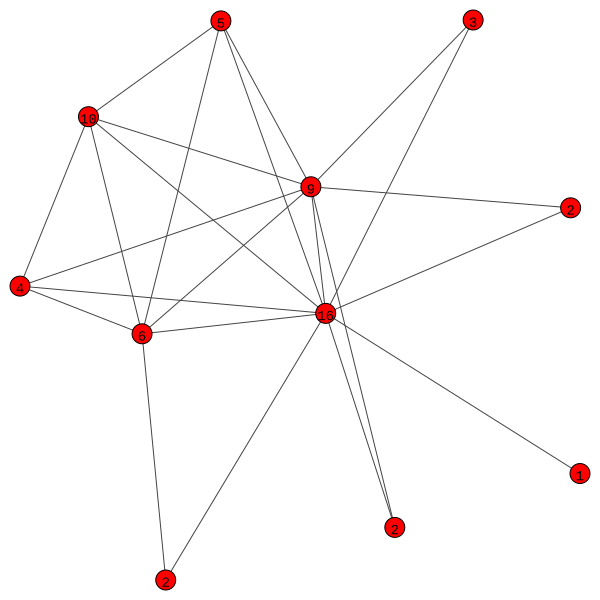

In [ ]:
#@title
ig.plot(partition_optimal.subgraphs()[0],vertex_color = 'red')


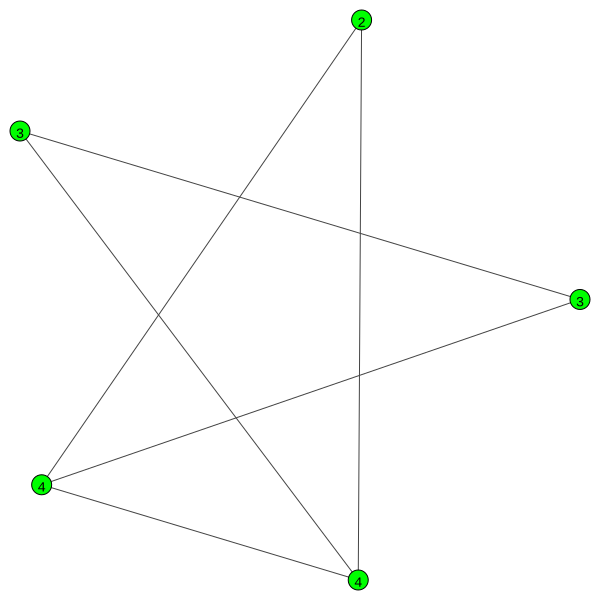

In [ ]:
#@title
ig.plot(partition_optimal.subgraphs()[1],vertex_color = 'green')


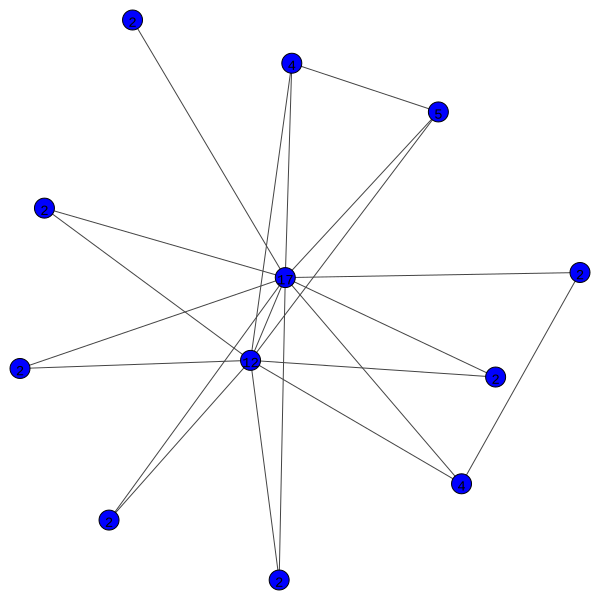

In [ ]:
#@title
ig.plot(partition_optimal.subgraphs()[2],vertex_color = 'blue')


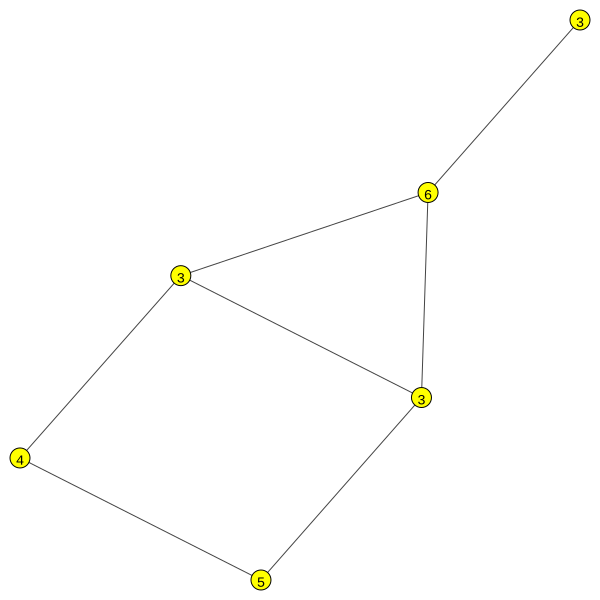

In [ ]:
#@title
ig.plot(partition_optimal.subgraphs()[3],vertex_color = 'yellow')

In [ ]:
#@title
# number of communities

partition_optimal.summary()

'Clustering with 34 elements and 4 clusters'

In [ ]:
#@title
# size of communities

partition_optimal.sizes()

[11, 5, 12, 6]

In [ ]:
# modularity measure: how modular is a given division of a graph into subgraphs

**modularity** calculates the modularity of a graph with respect to the given membership vector.

The modularity of a graph with respect to some division (or vertex types) measures how good the division is, or how separated are the different vertex  types from each other. It defined as:

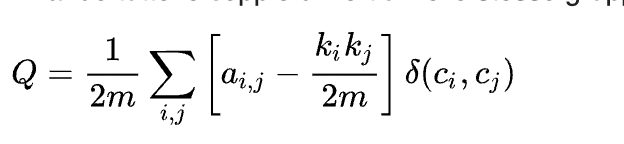

here:

m is the number of edges,

aij is the element of the A adjacency matrix in
row i and column j,

ki is the degree of i,

kj is the degree of j,

ci is the type (or component) of i,

cj that of j, the sum goes over all i and j pairs of vertices,  

delta(x,y) is 1 if x=y and 0 otherwise.

If edge weights are given, then these are considered as the element of the A adjacency matrix, and ki is the sum of weights of adjacent edges for vertex i.

The value of the modularity for unweighted and undirected graphs lies in the range: [-1/2,1].

It is positive if the number of edges within groups exceeds the number expected on the basis of chance. For a given division of the network's vertices into some modules, modularity reflects the concentration of edges within modules compared with random distribution of links between all nodes regardless of modules.



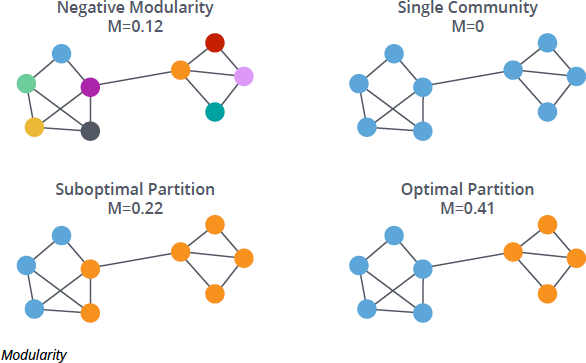

In [ ]:
partition_optimal.modularity

0.4197896120973046

In [ ]:
# memberships of nodes
partition_optimal.membership

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2]

In [ ]:
#@title
# What is the size of the last community?

partition_optimal.sizes()[-1]

6

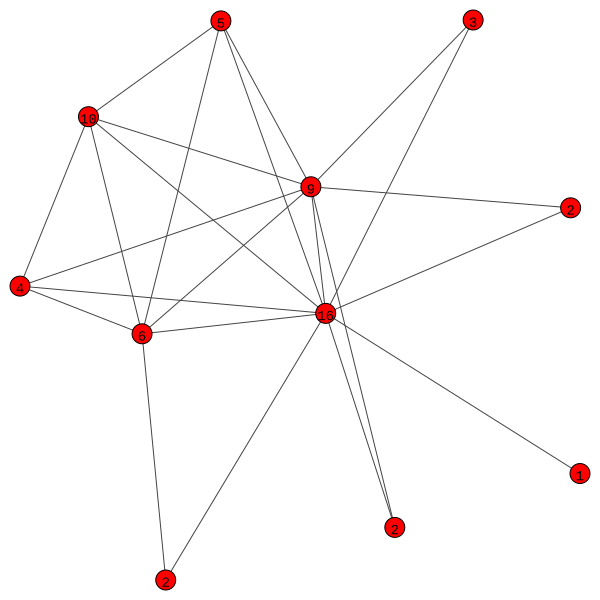

In [ ]:
#@title
# Isolate single community

sub_g = G.induced_subgraph(partition_optimal[0])
ig.plot(sub_g)

In [ ]:
#@title
# What is the assortativity of this community?
# Can you give an explanation? Un bel po' più dissasortativa rispetto alla rete iniziale
# quindi togliendo il nodo principale si andrebbe a distruggere, attaco haker

sub_g.assortativity_degree()

-0.6600637522768662

In [ ]:
#@title
# extract all induced subgraphs

print(partition_optimal.subgraphs())

[<igraph.Graph object at 0x7b8d400b7850>, <igraph.Graph object at 0x7b8d400b7550>, <igraph.Graph object at 0x7b8d400b7750>, <igraph.Graph object at 0x7b8d400b6d50>]


In [ ]:
#How do you highlight the elements of a specific subgraph (red), while keeping the other elements visible (white)?
#molto utile per communità grosse

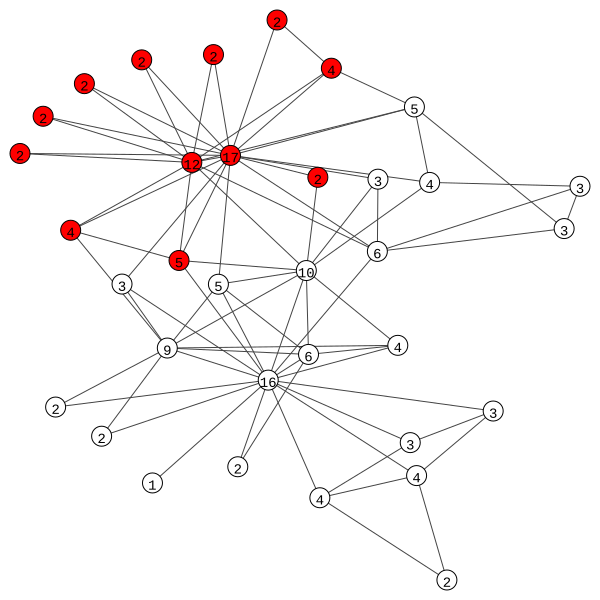

In [ ]:
#@title
id_subgraph = 2
color_list = []
for i in G.vs.indices:
  if G.vs.indices[i] in partition_optimal[id_subgraph]:
    color_list.append('red')
  else:
    color_list.append('white')

G.vs['color'] = color_list
ig.plot(G)

In [ ]:
#How do you set the label of each element equal to its cluster ID?

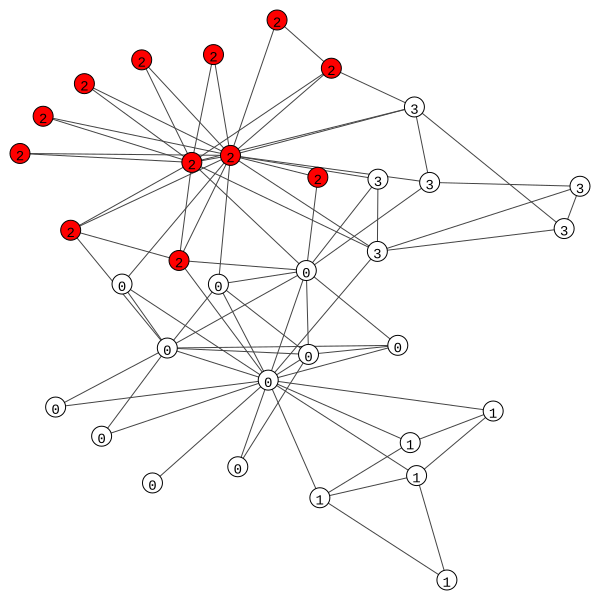

In [ ]:
#@title
G.vs['label'] = partition_optimal.membership
ig.plot(G)

### Approach 2

**Louvain algorithm**

The algorithm is based on the modularity measure and a hierarchical approach.



1. Initially, each vertex is assigned to a community on its own.
2.  In every step, vertices are re-assigned to communities in a local, greedy way: in a random order, each vertex is moved to the community with which it achieves the highest contribution to modularity
3. When no vertices can be reassigned, each community is considered a vertex on its own, and the process starts again with the merged communities.
4. The process stops when there is only a single vertex left or when the modularity cannot be increased any more in a step.

In [ ]:
partition_louvain = G.community_multilevel()
#beware! it's not deterministic

In [ ]:
# modularity measure: how modular is a given division of a graph into subgraphs
partition_louvain.modularity

0.41880341880341876

In [ ]:
#@title
# number of communities

partition_louvain.summary()

'Clustering with 34 elements and 4 clusters'

In [ ]:
#@title
# size of communities

partition_louvain.sizes()

[12, 5, 11, 6]

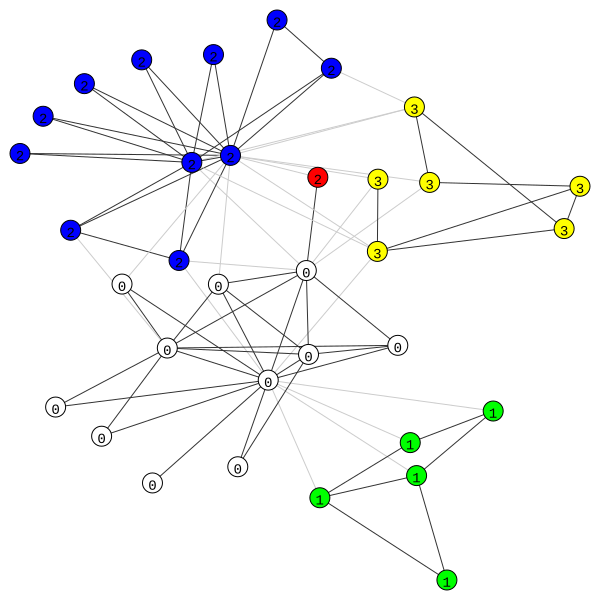

In [ ]:
#@title
ig.plot(partition_louvain)

In [ ]:
#are there any nodes with a color that doesn't correspond to partition id?

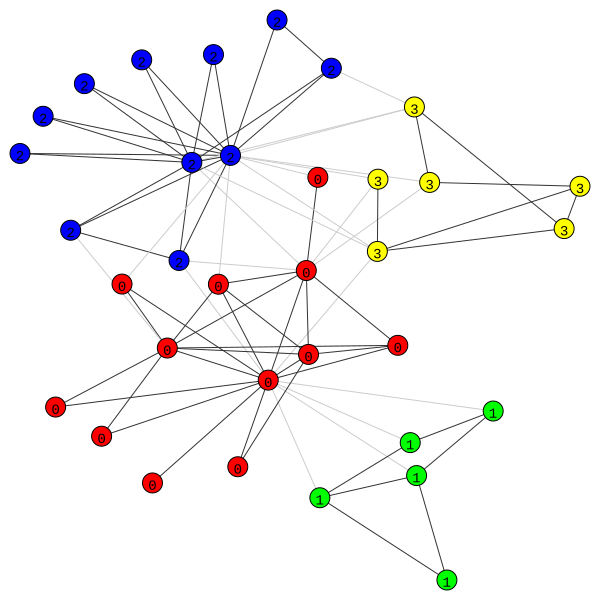

In [ ]:
#@title
G.vs['label'] = partition_louvain.membership #let's "reset" the labels
G.vs['color'] = 'red' #let's "reset" the colors
ig.plot(partition_louvain)

### Approach 3
The **community_leading_eigenvector** method works by:
* calculating the eigenvector of the modularity matrix for the largest positive eigenvalue, and
* then separating vertices into two community based on the sign of the corresponding element in the space spanned by the eigen-vectors.

This is the proper implementation of the recursive, divisive algorithm: each split is done by maximizing the modularity regarding the original network


---



**def:** community_leading_eigenvector(self, clusters=None, weights=None, arpack_options=None)

*clusters*	the desired number of communities. If None, the algorithm tries to do as many splits as possible. Note that the algorithm won't split a community further if the signs of the leading eigenvector are all the same, so the actual number of discovered communities can be less than the desired one.

In [ ]:
partition_eigen = G.community_leading_eigenvector()

In [ ]:
# modularity measure: how modular is a given division of a graph into subgraphs
partition_eigen.modularity

0.39340894148586447

In [ ]:
# number of communities
partition_eigen.summary()

'Clustering with 34 elements and 4 clusters'

In [ ]:
# size of communities
partition_eigen.sizes()

[7, 12, 9, 6]

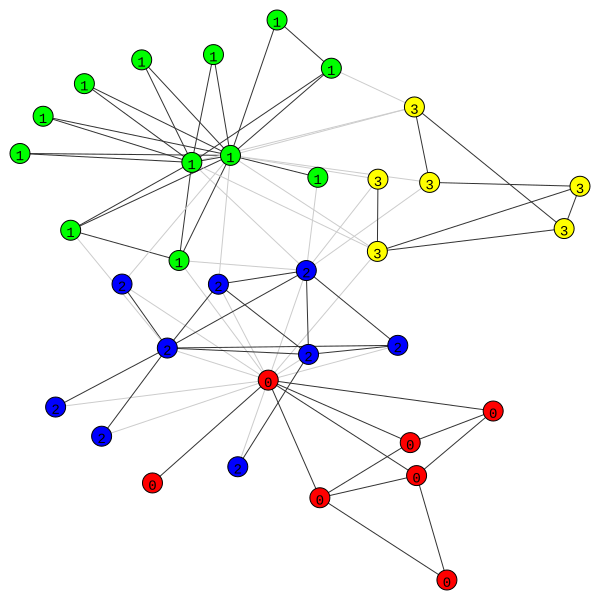

In [ ]:
G.vs['label'] = partition_eigen.membership
G.vs['color'] = 'red' #let's "reset" the colors
ig.plot(partition_eigen)

In [ ]:
#beware! the membership of the node might not be consistent across methods

In [ ]:
#les's do this again with the Dolphin and the Miserables networks
# Per quanto riguarda Miserables potrebbero essere sottotrame(infornmazione), sono molto isolati prk?

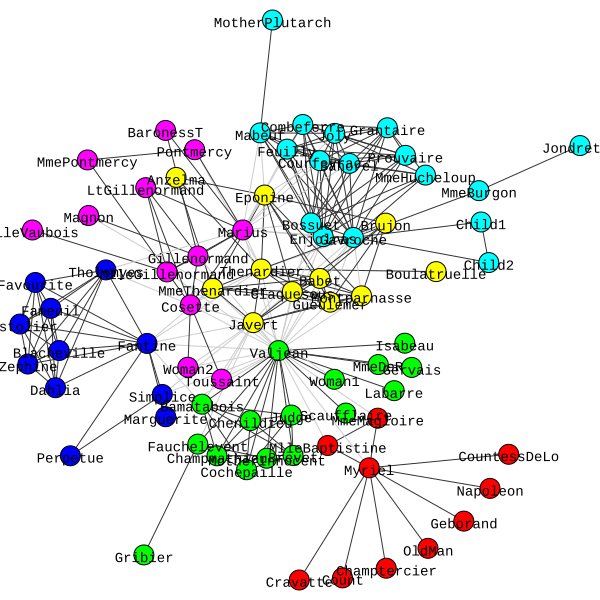

In [ ]:
partition_louvain_mis = G_miserables.community_multilevel()
partition_louvain_del = G_dolphins.community_multilevel()

ig.plot(partition_louvain_mis)

# Divisive Hierarchical Approaches

 ## Betweenness-Based Community Detection

The idea is that the betweenness of the edges connecting two communities is typically high, as many of the shortest paths between nodes in separate communities go through them.

So we gradually remove the edge with highest betweenness from the network, and recalculate edge betweenness after every removal.

This way sooner or later the network falls off to two components, then after a while one of these components falls off to two smaller components, etc. until all edges are removed.

This is a **divisive hierarchical approach**, the result is a dendrogram.

In [ ]:
G = ig.Graph.Famous('Zachary') #reload the network to recover the original ID's

I nodi più vicini dovrebbero essere quelli più simili

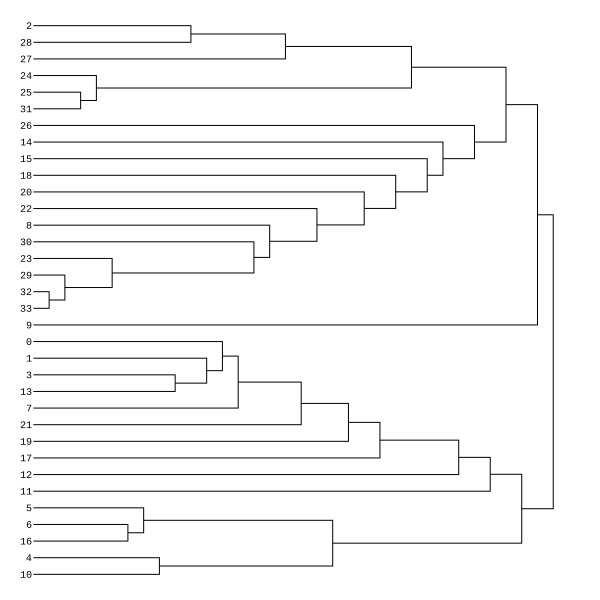

In [ ]:
dendrogram = G.community_edge_betweenness(clusters=None)
ig.plot(dendrogram)

In [ ]:
dendrogram.summary()

'Dendrogram, 34 elements, 33 merges'

In [ ]:
#what about the cut? (the ID's are different)

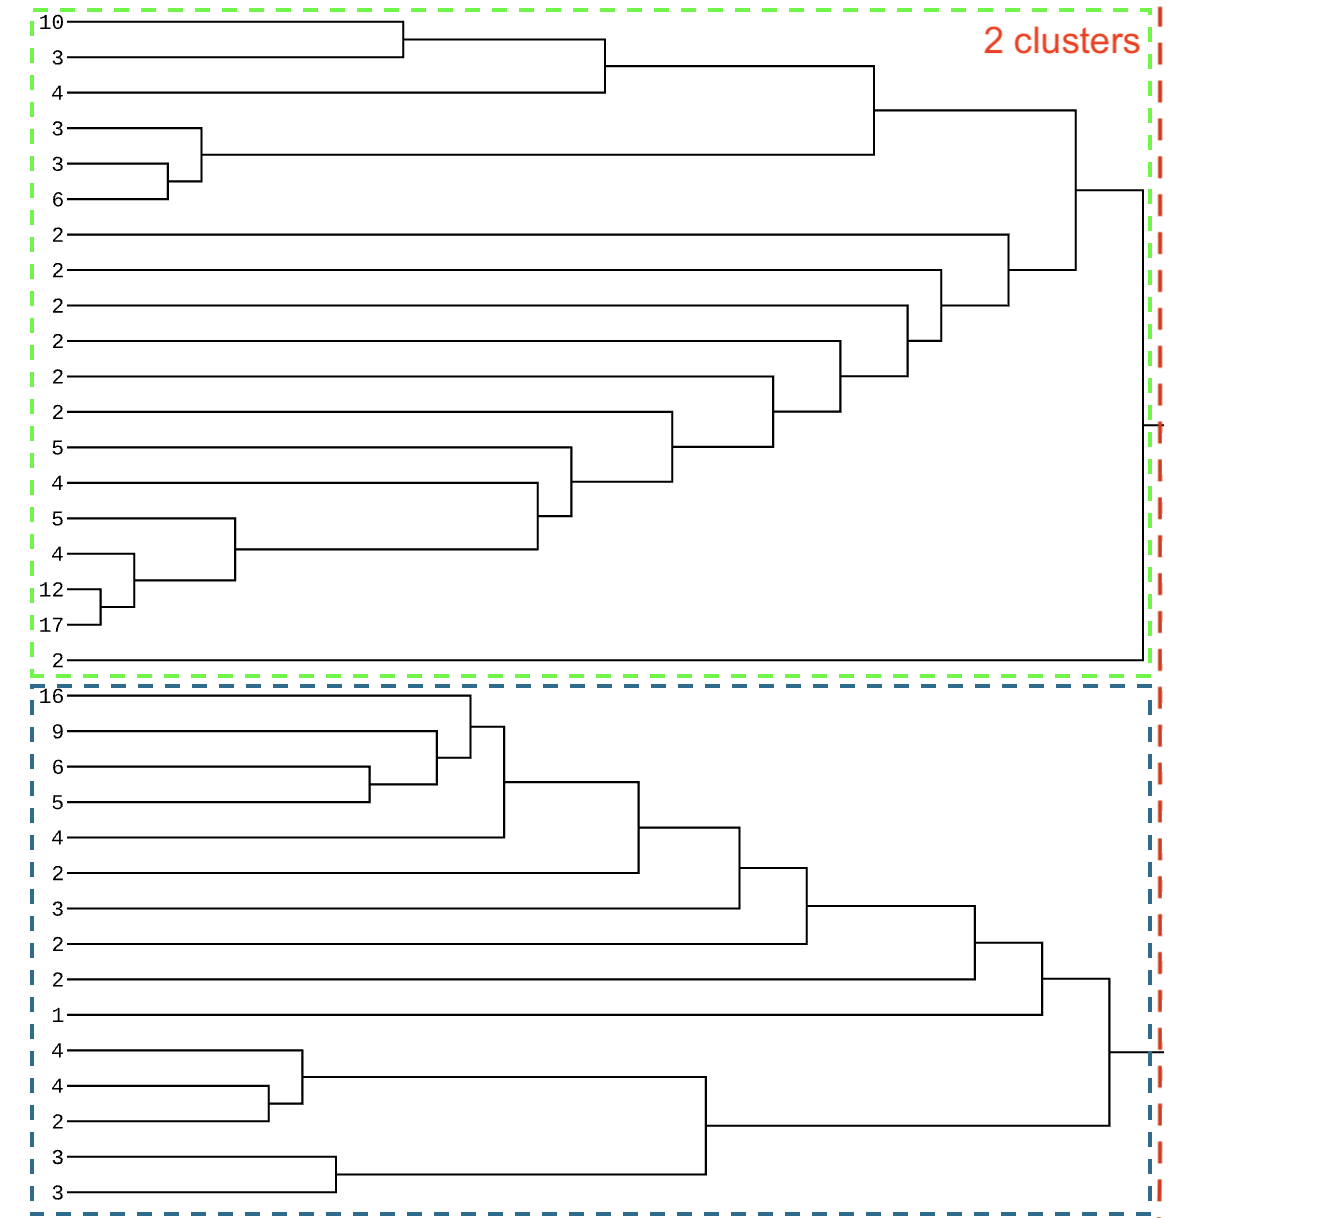

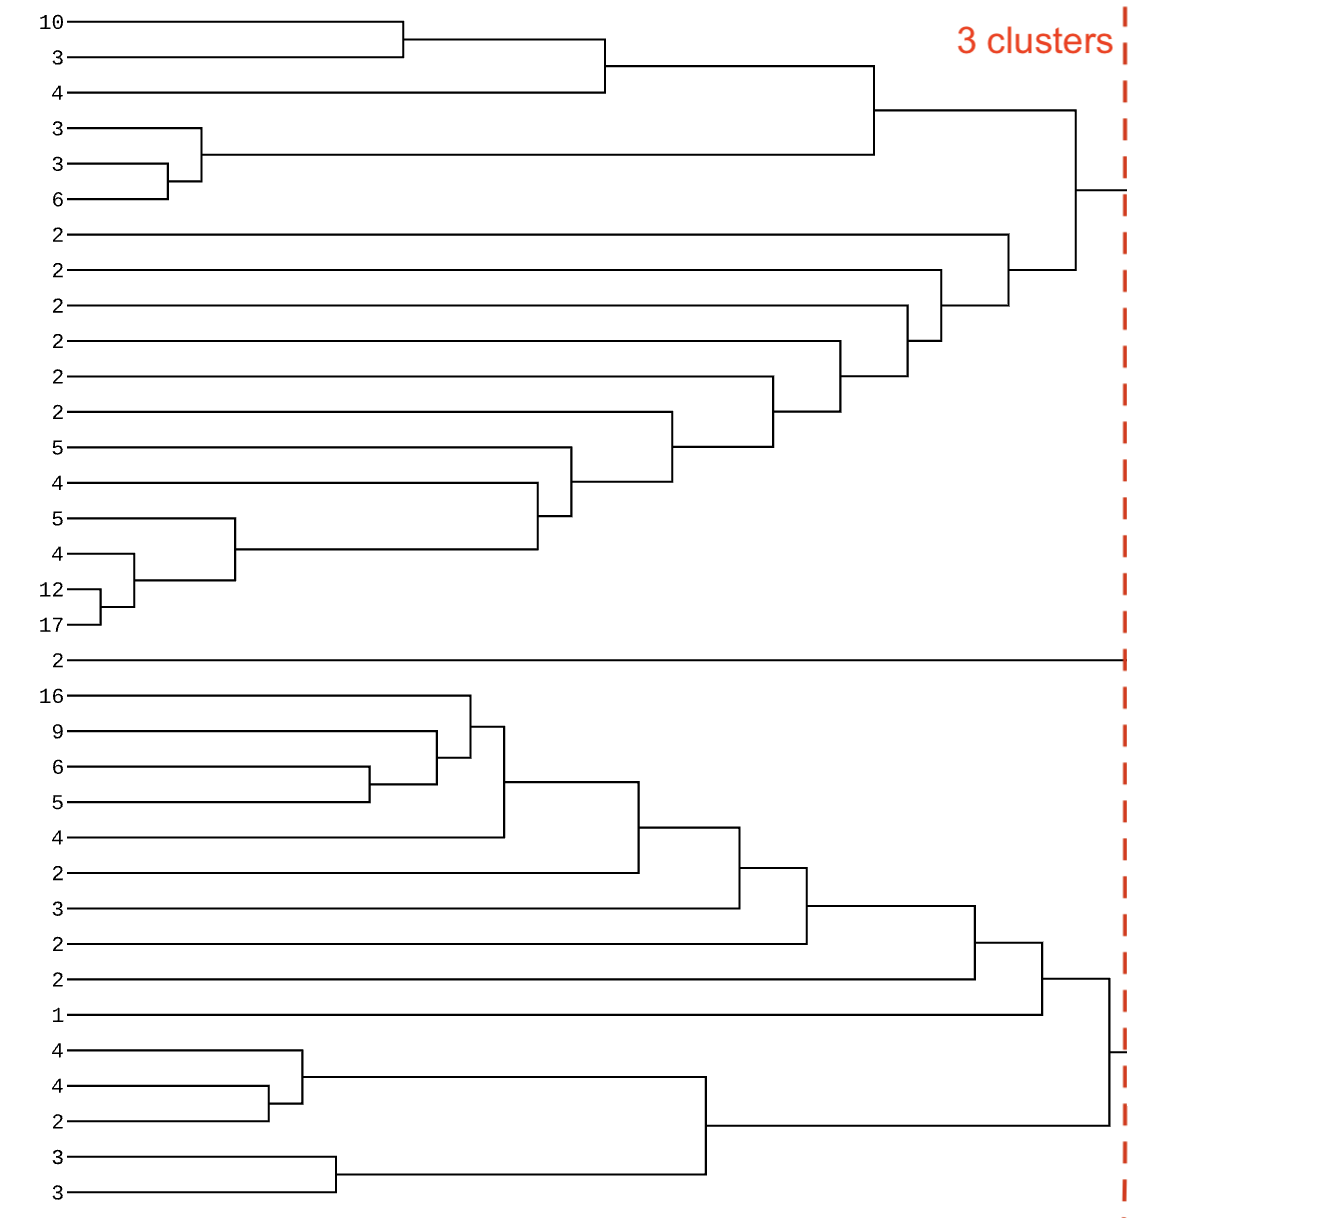

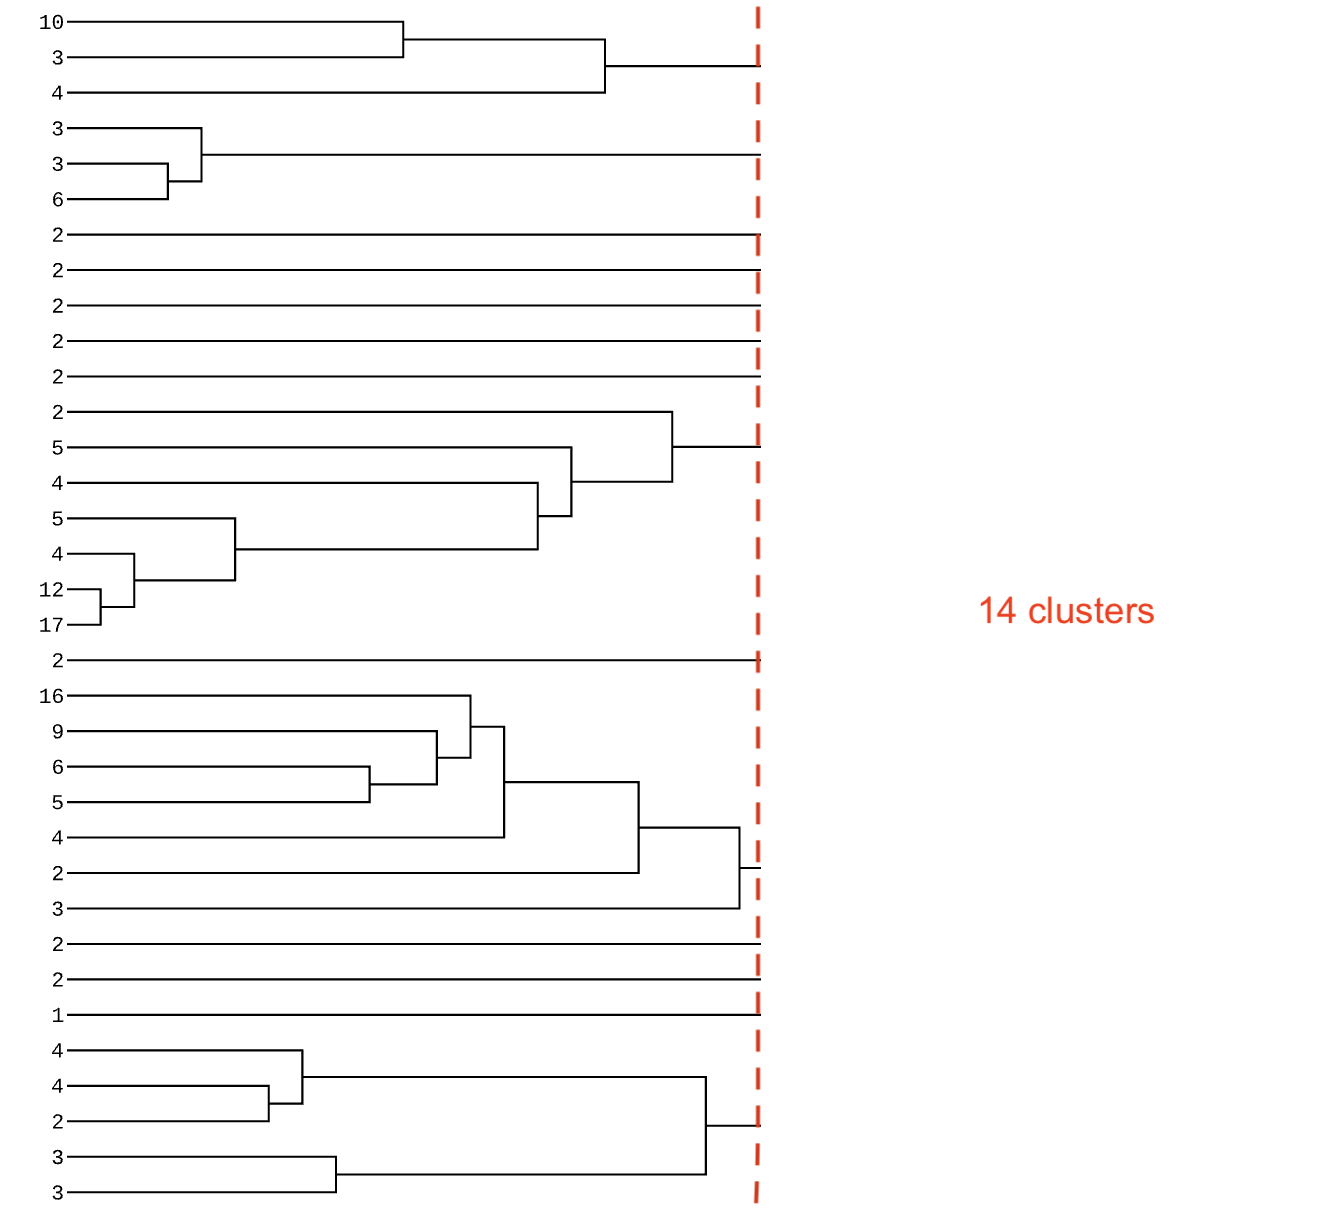

In [ ]:
partition_edge_betw = dendrogram.as_clustering()

In [ ]:
print(partition_edge_betw)

Clustering with 34 elements and 5 clusters
[0] 0, 1, 3, 7, 11, 12, 13, 17, 19, 21
[1] 2, 24, 25, 27, 28, 31
[2] 4, 5, 6, 10, 16
[3] 8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33
[4] 9


In [ ]:
# modularity measure: how modular is a given division of a graph into subgraphs
partition_edge_betw.modularity

0.40129848783694944

In [ ]:
# number of communities
partition_edge_betw.summary()

'Clustering with 34 elements and 5 clusters'

In [ ]:
# size of communities
partition_edge_betw.sizes()

[10, 6, 5, 12, 1]

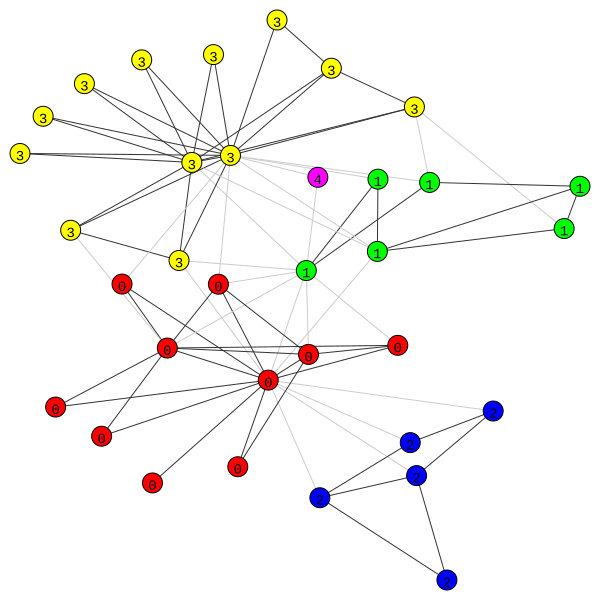

In [ ]:
G.vs['label'] = partition_edge_betw.membership
ig.plot(partition_edge_betw)

We can also fix the number of community we want, like politician community

Like usare strumenti, e conoscenza pregressa

Clustering with 34 elements and 2 clusters
[0] 0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21
[1] 2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33


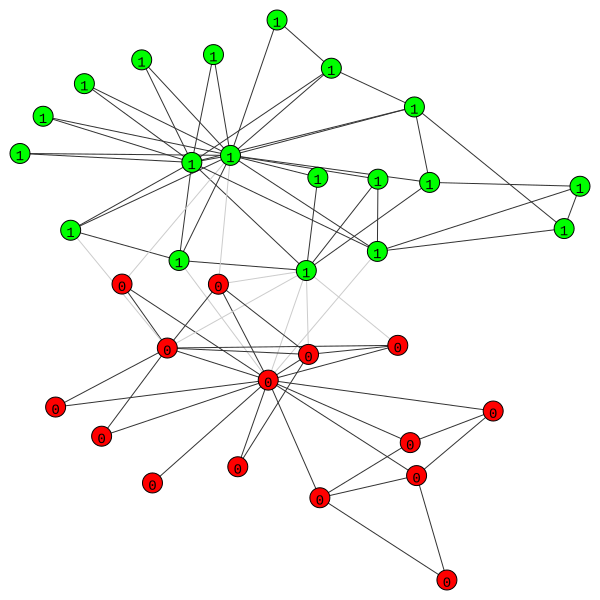

In [ ]:
dendrogram_cut_2 = G.community_edge_betweenness(clusters=2)
print(dendrogram_cut_2.as_clustering())

# per avere la partizione in oggetto igraph
partition_edge_betw_cut_2 = dendrogram_cut_2.as_clustering()

G.vs['label'] = partition_edge_betw_cut_2.membership
ig.plot(partition_edge_betw_cut_2)

In [ ]:
#what about the modularity? is it better or worse in this case? what do you expect?
# Anche se la modularità è peggiore comunque è 2 visto che ho la conoscenza a priori.

In [ ]:
#@title
partition_edge_betw_cut_2.modularity

0.3599605522682447

In [ ]:
#can we think of an iterative command to automatically select the number of clusters?
#what is the first problem that comes into your mind?

In [ ]:
#@title
min_n_clusters = 1
max_n_clusters = 10 #careful
modularity_vector = []
for i in range(min_n_clusters,max_n_clusters):
  partition_edge_betw = G.community_edge_betweenness(clusters=i).as_clustering()
  modularity_vector.append(partition_edge_betw.modularity)

print('The optimal number of clusters w.r.t. modularity is {}'.format(np.argmax(modularity_vector)+1))
print('The modularity modularity is {}'.format(max(modularity_vector)))

The optimal number of clusters w.r.t. modularity is 5
The modularity modularity is 0.40129848783694944


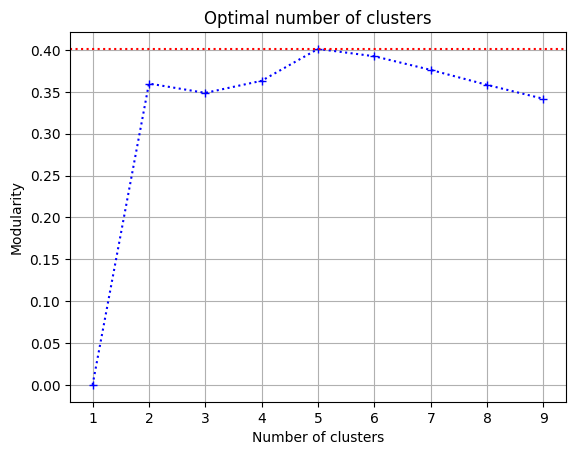

In [ ]:
#@title
plt.plot(range(min_n_clusters,max_n_clusters),modularity_vector,'+b:')
plt.xlabel('Number of clusters')
plt.ylabel('Modularity')
plt.title('Optimal number of clusters')
plt.axhline(y = max(modularity_vector), color = 'r', linestyle = ':')
plt.grid(True)

# Communities manipulation

Here we introduce a new graph. It is a undirected, weighted graph representing the **coauthorship network of scientists** working on network theory and experiment.

A coauthorship network of scientists working on network theory and experiment, as compiled by M. Newman in May 2006. The network was compiled from the bibliographies of two review articles on networks, M. E. J. Newman, SIAM Review 45, 167-256 (2003) and S. Boccaletti et al., Physics Reports 424, 175-308 (2006), with a few additional references added by hand.

The version given here contains all components of the network, for a total of 1589 scientists, and not just the largest component of 379 scientists previously published. The network is weighted, with weights assigned as described in M. E. J. Newman, Phys. Rev. E 64, 016132 (2001).



In [ ]:
G=ig.Graph.Read_GML('netscience.gml')

In [ ]:
G.summary()

'IGRAPH U--- 1589 2742 -- \n+ attr: id (v), label (v), value (e)'

In [ ]:
print(G)

IGRAPH U--- 1589 2742 --
+ attr: id (v), label (v), value (e)
+ edges:
   0 --    1 1084
   1 --    0  946 1084
   2 --    3    4    5    6
   3 --    2    4    5    6
   4 --    2    3    5    6
   5 --    2    3    4    6
   6 --    2    3    4    5
   7 --    8    9   10   11
   8 --    7
   9 --    7   10   11 1424 1425 1532
  10 --    7    9   11
  11 --    7    9   10
  12 --   13   14   15 1047 1048 1049 1050
  13 --   12   14   15
  14 --   12   13   15
  15 --   12   13   14
  16 --   17   18
  17 --   16   18
  18 --   16   17
  19 --
  20 --   21   22
  21 --   20   22
  22 --   20   21
  23 --   24   25
  24 --   23   25  201  202  369
  25 --   23   24  201  202  369
  26 --
  27 --   28   29
  28 --   27   29
  29 --   27   28
  30 --   31   32   33   34   54  131  327  402  840  894
  31 --   30   32
  32 --   30   31
  33 --   30   34   51   52   53   54  131  132  133  134  190  375  376  377
464  485  488  489  507  508  509  561  562  839  840 1008 1190 1191 1228 122

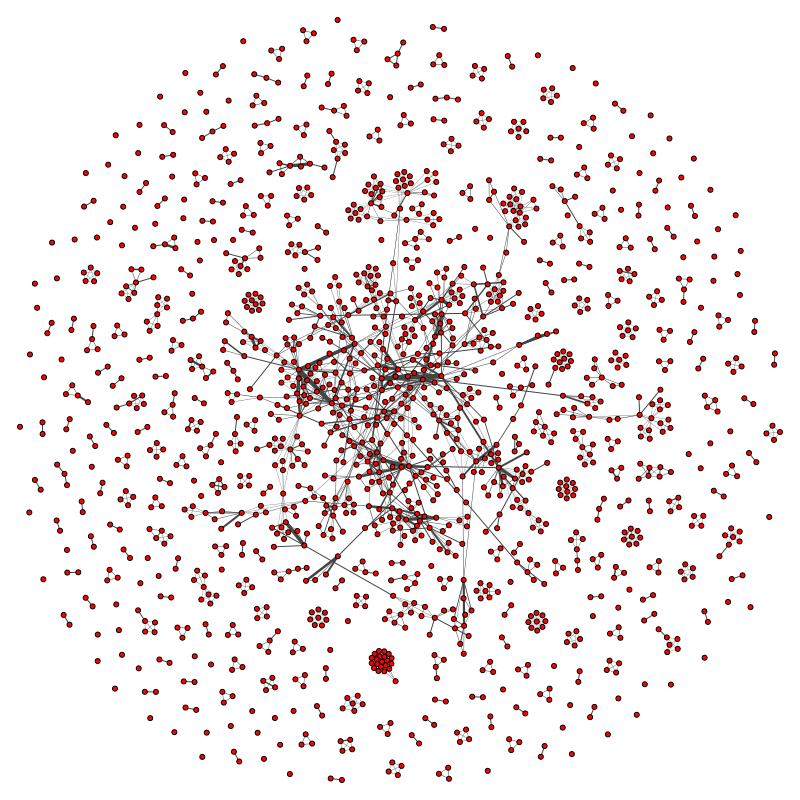

In [ ]:
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_color"] = "red"
#visual_style["vertex_label"] = G.vs["label"]
visual_style["vertex_label"] = None
visual_style["edge_width"] = [element for element in G.es["value"]]
#visual_style["layout"] = 'mds'
#visual_style["layout"] = 'circular' #ordina con id ma non ha tanto senso questo ordinamento, forse temporale si
visual_style["layout"] = 'graphopt' #nice one!, ottimizzazione reti grandi
visual_style["bbox"] = (0,0,800,800)

ig.plot(G, **visual_style)

In [ ]:
# Can you compute network assortativity? Can you extract some insight?
# famous publishes with famous

In [ ]:
#@title
G.assortativity_degree()

0.4616224667525836

E' assortativa prk?
- Mondo ricerca scientifica: si crea delle comunità delle persone che comunicano insieme, quindi ricercatori pubblicano tanto e insieme.

- Nodi poco connessi sono collegati a nodi poco connessi.(meno famosi con meno famosi)

Now we try to extract the different communities using edge betweenness

In [ ]:
dendrogram = G.community_edge_betweenness()

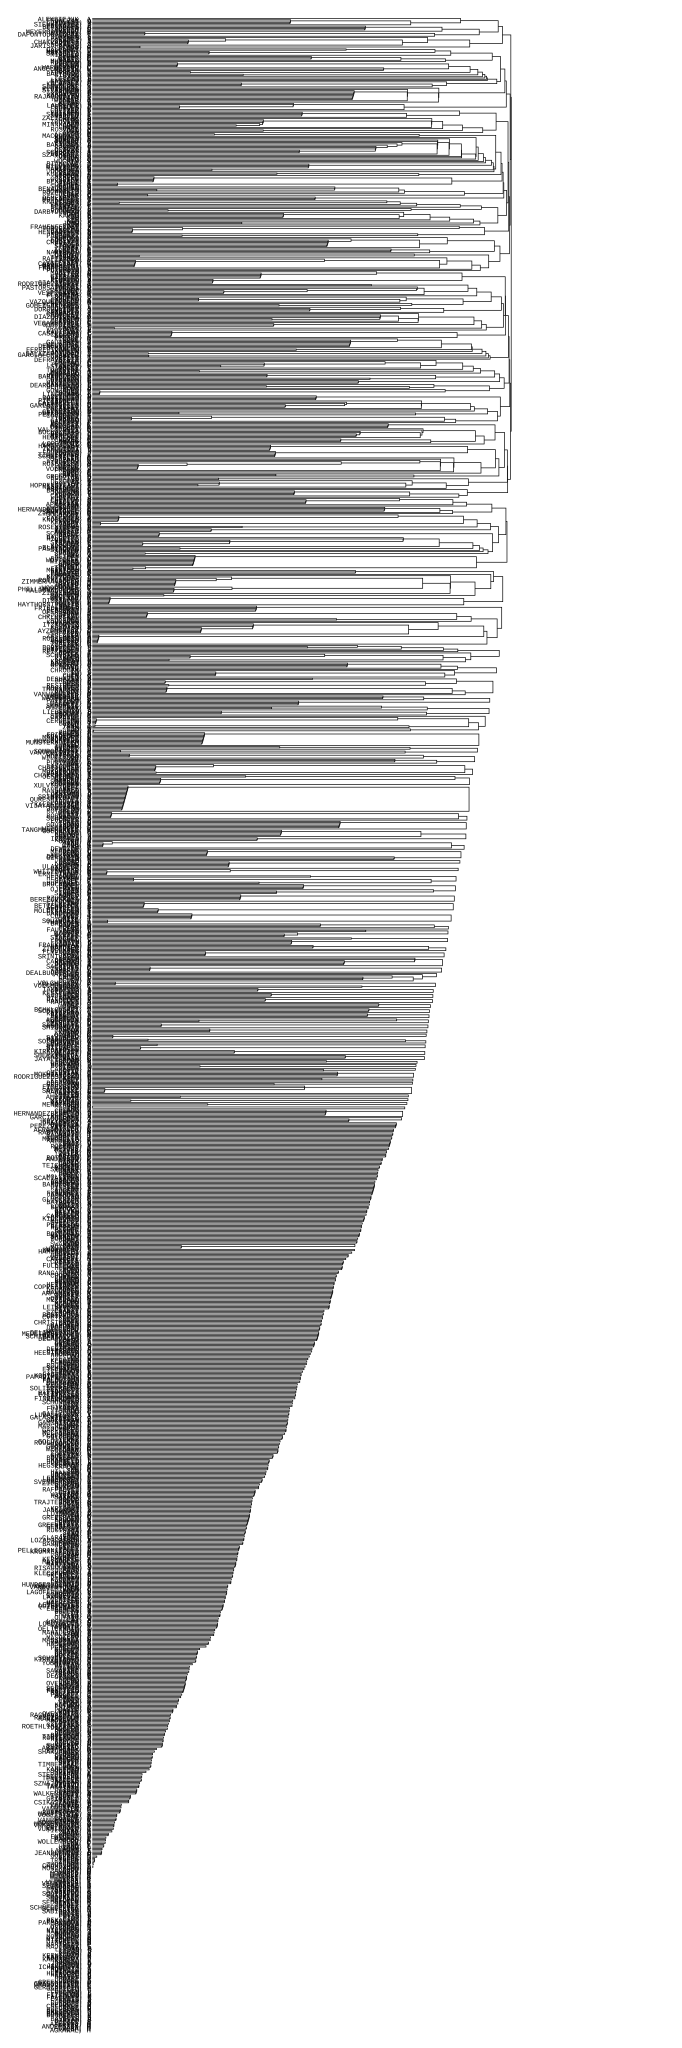

In [ ]:
#@title
ig.plot(dendrogram, bbox =(0,0,1000,3000),target='dentro_test.pdf')

In [ ]:
#can we extract the partition?

In [ ]:
#@title, se grafo spagliato con nodi non completamente connessi va a dare eccezione.
try:
  partition_edge_betw = dendrogram.as_clustering()
except Exception as e:
  print(e)

This because the Edge betweenness community deection **works only on connected graphs**

We have to focus on the **giant component**


In [ ]:
dendrogram = G.clusters().giant().community_edge_betweenness()
partition_edge_betw = dendrogram.as_clustering()

<ipython-input-289-eb774912f7fc>:1: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  dendrogram = G.clusters().giant().community_edge_betweenness()


In [ ]:
partition_edge_betw.summary()

'Clustering with 379 elements and 17 clusters'

In [ ]:
# max 1, se 0.84 molto buona
partition_edge_betw.modularity
# si può vedere che effettivamente l'idea iniziale che pubblicano solo con il proprio gruppo è vera.
# potrei estrarre un cluster e da questo fare altri studi

0.8421850236295124

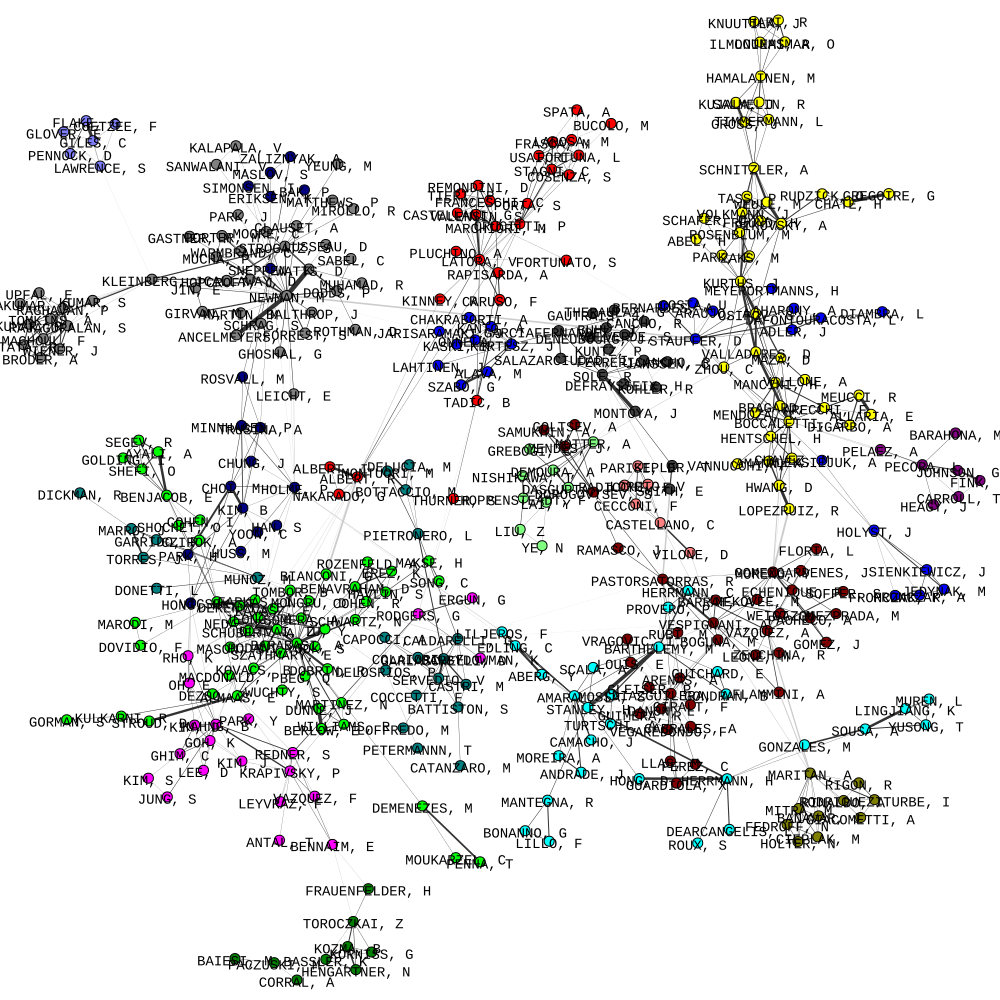

In [ ]:
visual_style = {}

visual_style["vertex_size"] = 10
visual_style["edge_width"] = [element for element in G.es["value"]]
visual_style["layout"] = 'graphopt' #nice one!
visual_style["bbox"] = (0,0,1000,1000)

ig.plot(partition_edge_betw,**visual_style)

In [ ]:
#what happens if we set the number of clusters equal to 2?

In [ ]:
dendrogram_cut_2 = G.clusters().giant().community_edge_betweenness(clusters = 2)
partition_edge_betw_cut_2 = dendrogram_cut_2.as_clustering()
print(partition_edge_betw_cut_2)

<ipython-input-294-eb579f38200a>:1: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  dendrogram_cut_2 = G.clusters().giant().community_edge_betweenness(clusters = 2)


Clustering with 379 elements and 2 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 15, 16, 17, 18, 19, 24, 25, 26, 27,
    28, 36, 37, 38, 39, 43, 44, 45, 46, 57, 58, 59, 60, 61, 62, 63, 64, 81,
    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 103, 104, 105, 106, 107, 111, 112,
    113, 114, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
    136, 137, 145, 146, 147, 151, 152, 153, 154, 155, 156, 157, 163, 164, 165,
    170, 171, 172, 173, 174, 175, 176, 183, 184, 185, 186, 187, 188, 189, 190,
    191, 192, 196, 197, 198, 199, 200, 201, 202, 203, 207, 230, 233, 234, 235,
    236, 237, 238, 239, 244, 245, 246, 248, 249, 250, 251, 252, 253, 254, 255,
    256, 257, 258, 259, 260, 261, 262, 263, 264, 272, 273, 277, 278, 281, 282,
    283, 294, 295, 296, 297, 298, 299, 300, 301, 303, 304, 305, 308, 309, 311,
    312, 313, 314, 315, 316, 322, 323, 324, 325, 326, 329, 330, 331, 332, 333,
    334, 339, 340, 341, 342, 343, 344, 345, 346, 351, 352, 353, 354, 355, 356,
    357, 358, 

In [ ]:
#what do you expect from modularity?

In [ ]:
#@title
partition_edge_betw_cut_2.modularity

0.4915991936758136

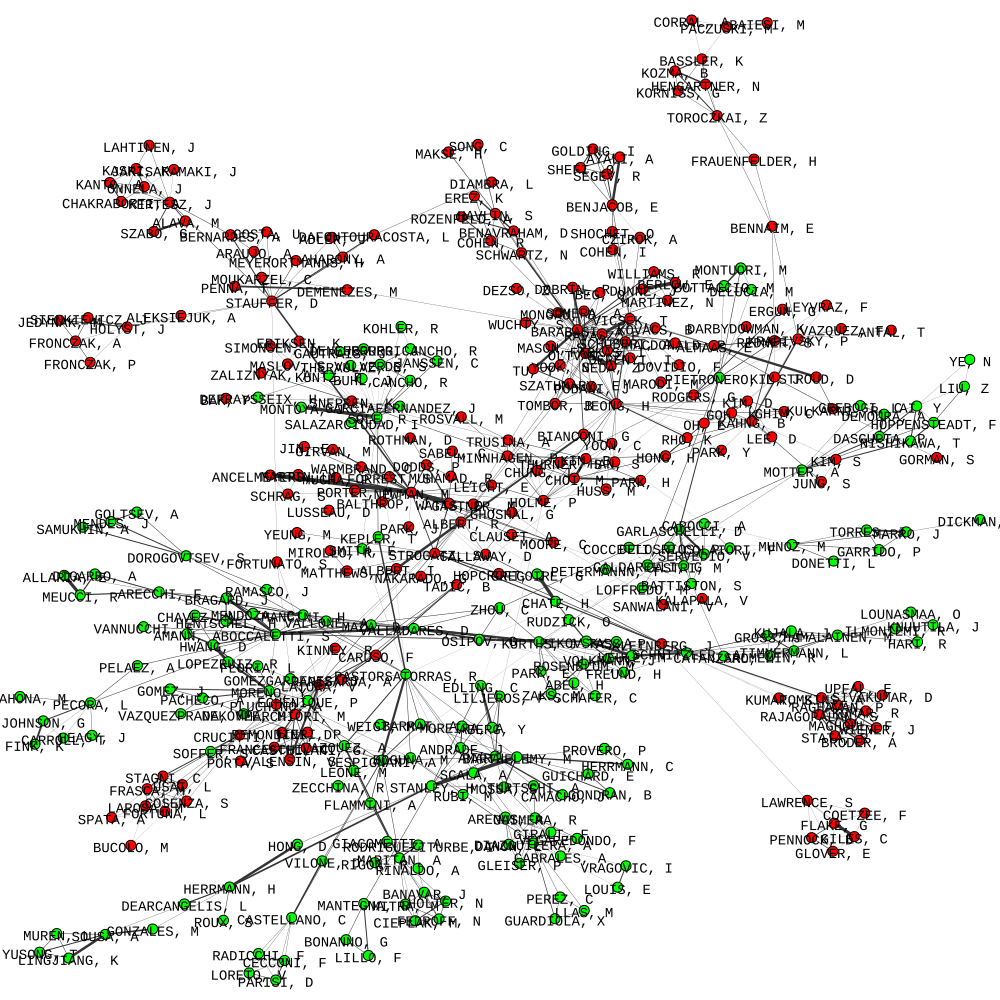

In [ ]:
visual_style = {}

visual_style["vertex_size"] = 10
visual_style["edge_width"] = [element for element in G.es["value"]]
visual_style["layout"] = 'graphopt' #nice one!
visual_style["bbox"] = (0,0,1000,1000)

ig.plot(partition_edge_betw_cut_2,**visual_style)

In [ ]:
#let's come back to the optimal partition with 17 clusters
#can you extract the most present author for each community?

In [ ]:
#@title
graphs = dendrogram.as_clustering().subgraphs()
community_most_cited = list()

for graph in graphs:
  graph.vs["centrality"] = graph.degree(graph.vs, mode="all")
  most_central = graph.vs[graph.vs["centrality"].index(max(graph.vs["centrality"]))]
  print(most_central["label"], '. with Degree Centrality  =', most_central["centrality"])
  community_most_cited.append(most_central["label"])

LATORA, V . with Degree Centrality  = 15
BARABASI, A . with Degree Centrality  = 33
STAUFFER, D . with Degree Centrality  = 10
KURTHS, J . with Degree Centrality  = 17
KAHNG, B . with Degree Centrality  = 12
AMARAL, L . with Degree Centrality  = 11
NEWMAN, M . with Degree Centrality  = 23
DIAZGUILERA, A . with Degree Centrality  = 15
BASSLER, K . with Degree Centrality  = 6
KIM, B . with Degree Centrality  = 9
MARITAN, A . with Degree Centrality  = 9
PECORA, L . with Degree Centrality  = 6
CALDARELLI, G . with Degree Centrality  = 10
SOLE, R . with Degree Centrality  = 15
CASTELLANO, C . with Degree Centrality  = 5
LAI, Y . with Degree Centrality  = 7
FLAKE, G . with Degree Centrality  = 5


In [ ]:
# can you extract the top 17 most cited author of the whole network?

In [ ]:
#@title
G.vs["centrality"] = G.degree(G.vs, mode="all")
most_cited = sorted([tuple([vertex["label"], vertex["centrality"]]) for vertex in G.vs],
                    key=lambda x: x[1], reverse=True)[:17]
print(most_cited)

[('BARABASI, A', 34), ('JEONG, H', 27), ('NEWMAN, M', 27), ('OLTVAI, Z', 21), ('YOUNG, M', 20), ('UETZ, P', 20), ('CAGNEY, G', 20), ('MANSFIELD, T', 20), ('ALON, U', 19), ('BOCCALETTI, S', 19), ('GIOT, L', 19), ('JUDSON, R', 19), ('KNIGHT, J', 19), ('LOCKSHON, D', 19), ('NARAYAN, V', 19), ('SRINIVASAN, M', 19), ('POCHART, P', 19)]


In [ ]:
# is there any overlap? How do you explain this result?

In [ ]:
#@title
most_cited_names = [e[0] for e in most_cited]
print(set(most_cited_names).intersection(set(community_most_cited)))

# Potrebbe essere più importante per la propria community ma non a livello collettivo

{'NEWMAN, M', 'BARABASI, A'}


In [ ]:
# Does WATTS, D and KLEINBERG, J know each other?

In [ ]:
#@title
v_target = G.vs.find(label = 'KLEINBERG, J')
v_source = G.vs.find(label = 'WATTS, D')

In [ ]:
vertex_path = G.get_shortest_paths(v=v_source, to=v_target, output='vpath')
print(vertex_path)

[[309, 78, 307]]


In [ ]:
vertex_path = G.get_shortest_paths(v=v_source, to=v_target, output='vpath')[0] #why [0]?

In [ ]:
[G.vs['label'][i] for i in vertex_path]

['WATTS, D', 'NEWMAN, M', 'KLEINBERG, J']

In [ ]:
#can we visualize this info?

In [ ]:
#@title
edge_path = G.get_shortest_paths(v=v_source, to=v_target, output='epath')[0]

In [ ]:
#let's plot the shortest path

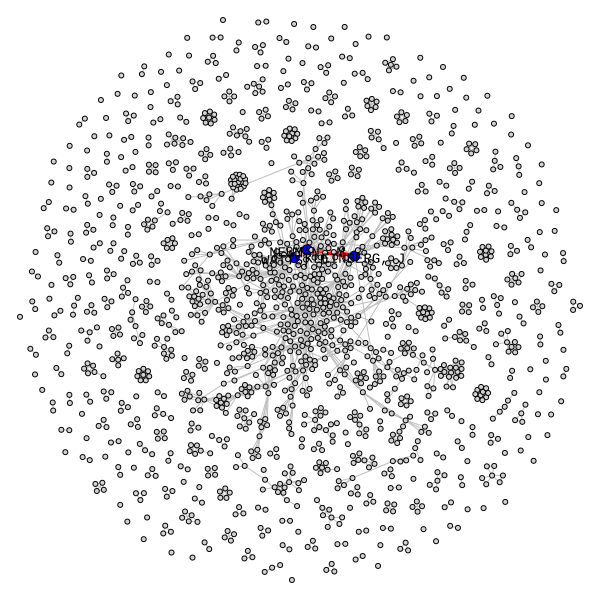

In [ ]:
visual_style = {}

visual_style["vertex_color"] = ["blue" if (l in vertex_path) else "lightgrey"
                                for l in G.vs["id"]]
visual_style["vertex_label"] = [' ' if (l not in vertex_path) else G.vs['label'][l]
                                for l in G.vs.indices]
visual_style["vertex_size"] = [5 if (l not in vertex_path) else 10
                               for l in G.vs.indices]
visual_style["edge_color"] = ["red" if (l in edge_path) else "grey"
                              for l in G.es.indices]
visual_style["edge_width"] = [5 if (l in edge_path) else 1
                              for l in G.es.indices]
visual_style["layout"] = "graphopt"
#visual_style["layout"] = "circular"

ig.plot(G, **visual_style)

In [ ]:
#how can we extract the component in which the three authors are present?

In [ ]:
#@title
ID_selected_component = G.clusters().membership[v_source.index]
induced_subgraph_component = G.induced_subgraph(G.clusters()[ID_selected_component])

<ipython-input-314-5cbdef584000>:2: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  ID_selected_component = G.clusters().membership[v_source.index]
<ipython-input-314-5cbdef584000>:3: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  induced_subgraph_component = G.induced_subgraph(G.clusters()[ID_selected_component])


In [ ]:
#how do we plot the component highlighting the three authors?

In [ ]:
#@title
v_target = induced_subgraph_component.vs.find(label = 'KLEINBERG, J')
v_source = induced_subgraph_component.vs.find(label = 'WATTS, D')
vertex_path = induced_subgraph_component.get_shortest_paths(v=v_source, to=v_target, output='vpath')[0]
edge_path = induced_subgraph_component.get_shortest_paths(v=v_source, to=v_target, output='epath')[0]

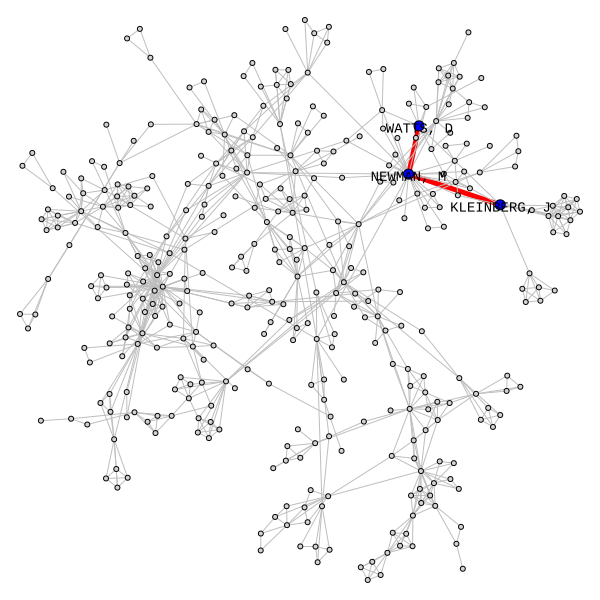

In [ ]:
#@title
visual_style = {}

visual_style["vertex_color"] = ["blue" if (l in vertex_path) else "lightgrey"
                                for l in induced_subgraph_component.vs.indices]
visual_style["vertex_label"] = [' ' if (l not in vertex_path) else induced_subgraph_component.vs['label'][l]
                                for l in induced_subgraph_component.vs.indices]
visual_style["vertex_size"] = [5 if (l not in vertex_path) else 10
                               for l in induced_subgraph_component.vs.indices]
visual_style["edge_color"] = ["red" if (l in edge_path) else "grey"
                              for l in induced_subgraph_component.es.indices]
visual_style["edge_width"] = [5 if (l in edge_path) else 1
                              for l in induced_subgraph_component.es.indices]
visual_style["layout"] = "graphopt"
#visual_style["layout"] = "circular"

ig.plot(induced_subgraph_component, **visual_style)

In [ ]:
#how do we find the most distant authors on the whole network?

In [ ]:
#@title
distances = np.array(G.shortest_paths())
print(distances)

<ipython-input-319-2f3e07791fa7>:2: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead
  distances = np.array(G.shortest_paths())


[[ 0.  1. inf ... inf inf inf]
 [ 1.  0. inf ... inf inf inf]
 [inf inf  0. ... inf inf inf]
 ...
 [inf inf inf ...  0.  2. inf]
 [inf inf inf ...  2.  0. inf]
 [inf inf inf ... inf inf  0.]]


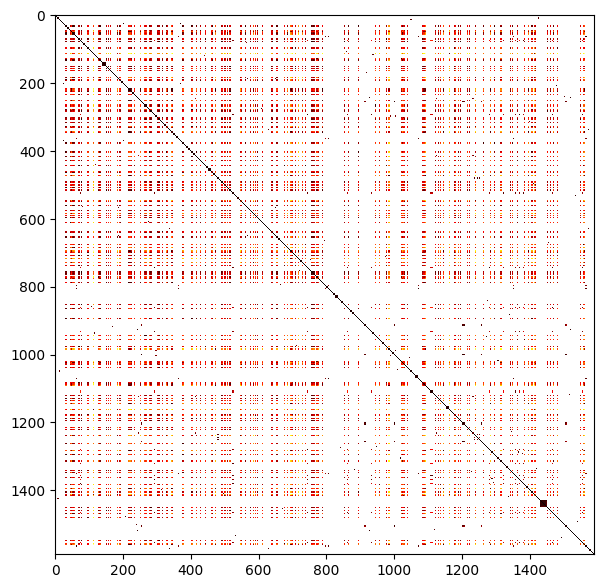

In [ ]:
#@title
fig = plt.figure(figsize =(10, 7))
plt.imshow(distances, cmap='hot', interpolation='nearest')

#https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.imshow.html

empty points cause do not connect

In [ ]:
#@title
try:
  np.histogram(distances)
except Exception as e:
  print(e)

autodetected range of [0.0, inf] is not finite


In [ ]:
#@title
distances_subgraph = np.array(induced_subgraph_component.shortest_paths())
print(distances_subgraph)

[[0 1 1 ... 7 8 8]
 [1 0 1 ... 8 9 9]
 [1 1 0 ... 8 9 9]
 ...
 [7 8 8 ... 0 9 9]
 [8 9 9 ... 9 0 1]
 [8 9 9 ... 9 1 0]]


<ipython-input-322-e72ab590623c>:2: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead
  distances_subgraph = np.array(induced_subgraph_component.shortest_paths())


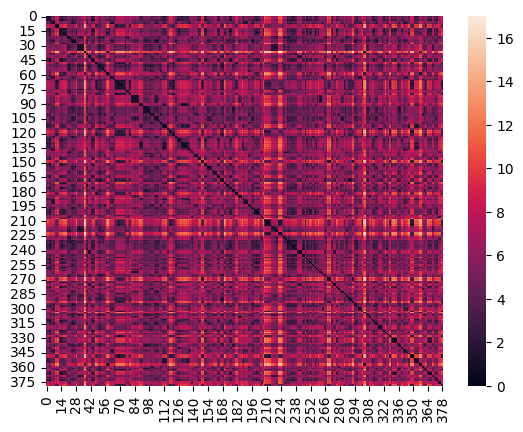

In [ ]:
#@title
ax = sns.heatmap(distances_subgraph)
plt.show()


(array([  379.,  1828.,  5832., 11386., 18738., 23550., 24704., 22418.,
        14698.,  8706.,  5624.,  3300.,  1410.,   580.,   272.,   202.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16.]),
 <BarContainer object of 16 artists>)

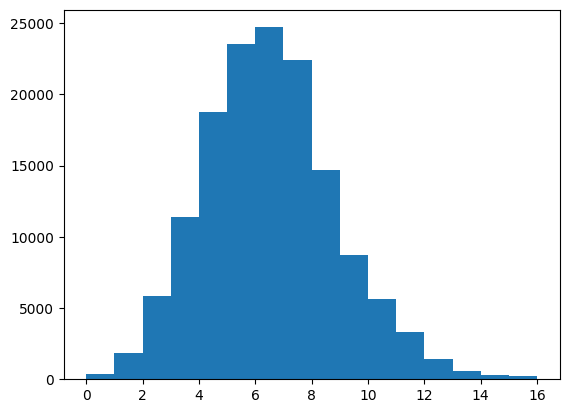

In [ ]:
#@title
plt.hist(np.concatenate(distances_subgraph), range(min(np.concatenate(distances_subgraph)),
                                  max(np.concatenate(distances_subgraph))))

In [ ]:
#could you retrieve the most 'isolated' elements? Non posso di tutto prk ci sono spazi vuoti, e quindi prendo la giant component

In [ ]:
#@title
most_distant_vertexes = []
for i in induced_subgraph_component.vs.indices:
  if max(induced_subgraph_component.vs[i].shortest_paths()[0]) ==  induced_subgraph_component.diameter():
    most_distant_vertexes.append(induced_subgraph_component.vs.indices[i])

AttributeError: 'igraph.Vertex' object has no attribute 'shortest_paths'

In [ ]:
#@title
visual_style = {}

visual_style["vertex_color"] = ["blue" if (l in most_distant_vertexes) else "lightgrey"
                                for l in induced_subgraph_component.vs.indices]
visual_style["vertex_label"] = [' ' if (l not in most_distant_vertexes) else induced_subgraph_component.vs['label'][l]
                                for l in induced_subgraph_component.vs.indices]
visual_style["vertex_size"] = [5 if (l not in most_distant_vertexes) else 10
                               for l in induced_subgraph_component.vs.indices]

visual_style["edge_color"] = ['grey']
visual_style["edge_width"] = 1
visual_style["layout"] = "graphopt"
#visual_style["layout"] = "circular"

ig.plot(induced_subgraph_component, **visual_style)

# Visualize Network

## Plotly Python Open Source Graphing Library

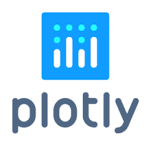


Plotly's Python graphing library makes interactive, publication-quality graphs online. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.

Here you can find the doc https://plotly.com/python-api-reference/
Here you can find the cheat sheet https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf

For using Plotly, you should create an account to https://plot.ly/api_signup

In [ ]:
!pip install chart_studio

Now get the API info here
https://chart-studio.plotly.com/Auth/login/?action=signup&next=%2Fsettings%2Fapi#/

In [ ]:
import chart_studio
from plotly.graph_objs import *
import chart_studio.plotly as py

In [ ]:
#chart_studio.tools.set_credentials_file(username='****', api_key='****')

In [ ]:
labels=list(G.vs['label'])
n_nodes=len(labels)
edge_list=[e.tuple for e in G.es]# list of edges
layt=G.layout('kk') #kamada-kawai layout

In [ ]:
#extract nodes position
Xn=[layt[k][0] for k in range(n_nodes)]
Yn=[layt[k][1] for k in range(n_nodes)]
# extraxt edges positions
Xe=[]
Ye=[]
for e in edge_list:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
#plot edges and nodes
trace1=Scatter(x=Xe,
               y=Ye,
               mode='lines',
               line= dict(color='rgb(210,210,210)', width=1),
               hoverinfo='none'
               )
trace2=Scatter(x=Xn,
               y=Yn,
               mode='markers',
               name='ntw',
               marker=dict(symbol='circle-dot',
                                        size=5,
                                        color='#6959CD',
                                        line=dict(color='rgb(50,50,50)', width=0.5)
                                        ),
               text=labels,
               hoverinfo='text'
               )
# Hide axis information
axis=dict(showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

width=800
height=800
layout_plotly=Layout(title= "Coauthorship network of scientists working on network theory and experiment"+\
              "<br> Data source: <a href='https://networkdata.ics.uci.edu/data.php?id=11'> [1]</a>",
    font= dict(size=12),
    showlegend=False,
    autosize=False,
    width=width,
    height=height,
    xaxis=layout.XAxis(axis),
    yaxis=layout.YAxis(axis),
    margin=layout.Margin(
        l=40,
        r=40,
        b=85,
        t=100,
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text='This igraph.Graph has the Kamada-Kawai layout',
            xref='paper',
            yref='paper',
            x=0,
            y=0,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ]
    )

data=[trace1, trace2]
fig=Figure(data=data, layout=layout_plotly)
py.iplot(fig)

# Assignment

Now create your analytics and derive your conclusions on the **“Madrid train bombing network”** https://en.wikipedia.org/wiki/2004_Madrid_train_bombings

FOUR kinds of ties linking the individuals involved:
1.   Trust-friendship (contact, kinship, links in the telephone center).
2.   Ties to Al Qaeda and to Osama Bin Laden.
3. Co-participation in training camps or wars.
4. Co-participation in previous terrorist attacks (Sept 11, Casablanca).

These four were added together providing a *“strength of connection”* index
that ranges from 1 to 4.

### Hint

For instance:
* Flush out the most dangerous terrorists;
  * Explain the concept adopted as “most dangerous”
* Detect the most cohesive groups of terrorists;
  * Detect the most influencial terrorist within each group
* Does these netowrks tents to show an assortative or disassortative trend? Can you think about a reason for that?

- Try different clustering approaches

# Import data

In [55]:
# the third column is supposed to be the weights
g=ig.Graph.Read_Ncol("madrid-edges.dat", names=True, directed=False)
names = list()

with open('madrid-names.dat') as f:
  for line in f:
    names.append(line.strip())

for v, name in zip(g.vs(), names):
    v["name"] = name
print(g.summary())

IGRAPH UNW- 64 486 -- 
+ attr: name (v), weight (e)


In [27]:
print(g.vs.attribute_names())
g.vs[0]

['name', 'label']


igraph.Vertex(<igraph.Graph object at 0x7c022191bd50>, 0, {'name': '"Jamal Zougam"', 'label': 0})

The most dangerous terrorists are the people who coordinate these attacks, specifically those who have decision-making power within the group and who distribute the orders.

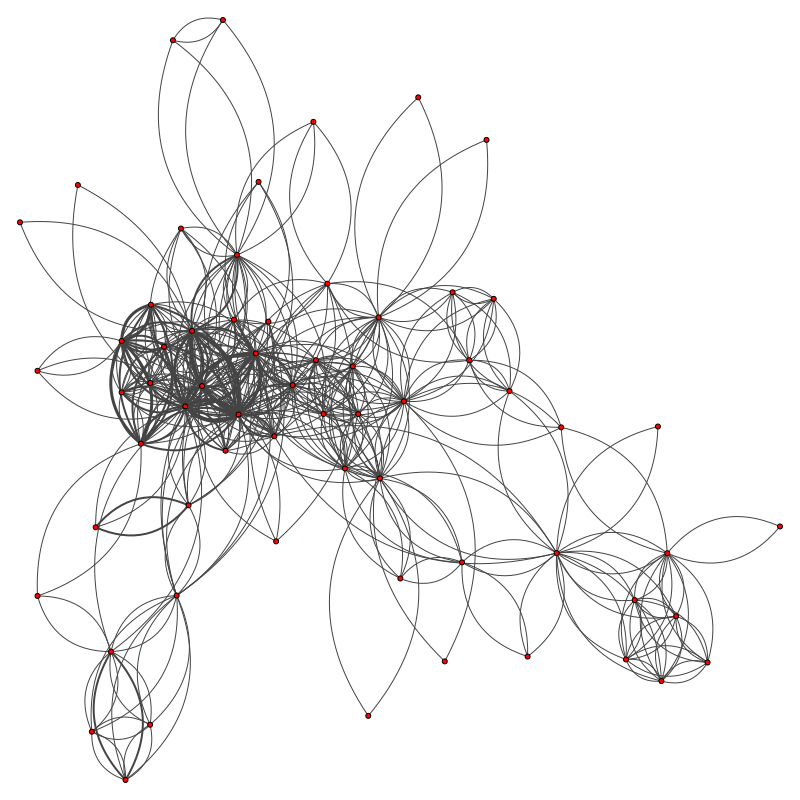

In [4]:
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_color"] = "red"
#visual_style["vertex_label"] = G.vs["label"]
visual_style["vertex_label"] = None
visual_style["edge_width"] = [element for element in g.es["weight"]]
#visual_style["layout"] = 'mds'
#visual_style["layout"] = 'circular' #ordina con id ma non ha tanto senso questo ordinamento, forse temporale si
visual_style["layout"] = 'graphopt' #nice one!, ottimizzazione reti grandi
visual_style["bbox"] = (0,0,800,800)

ig.plot(g, **visual_style)

Let's try to see how assortative or disassortative the graph is, since based on this we can decide on targeted strategies to destroy the network. However, at first glance, some hub nodes can be seen.

As we can see, the assortativity measured by the degree indicates that the network is neither assortative nor disassortative; this may mean that hubs communicate with other hubs but also with spoke nodes of equal rank. Correctly, in this scenario, spoke nodes do not only communicate with spoke nodes but also with non-spoke nodes, because otherwise it would mean that there would be no actors available for the terrorist attack.

In [5]:
g.assortativity_degree()

0.029464616495801618

Now let's see if there are clusters present with different methods to understand how to dismantle each subgroup. Since the graph is small, I will try to use the optimal community which is an NP-complete problem.

In [13]:
partition_optimal = g.community_optimal_modularity()
print(partition_optimal.modularity)

0.4485850734136053

From this graph, we can see that the red and green nodes can be considered the most dangerous network with more active messages and therefore, most likely, the target of these attacks. However, let's try different clustering to confirm or overturn this.

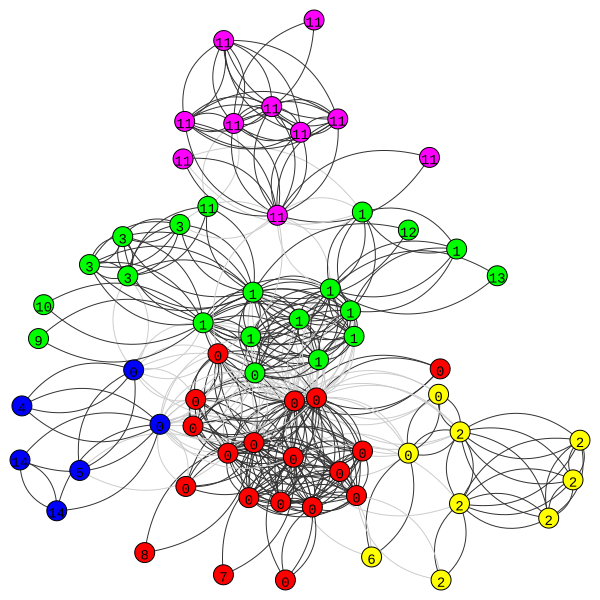

In [32]:
from igraph.drawing.colors import ClusterColoringPalette

membership = partition_optimal.membership
g.vs["cluster"] = membership
palette = ClusterColoringPalette(len(partition_optimal))

ig.plot(partition_optimal)

Now we are going to divide into clusters using betweenness, which is useful if we want to create clusters based on the connecting bridges.

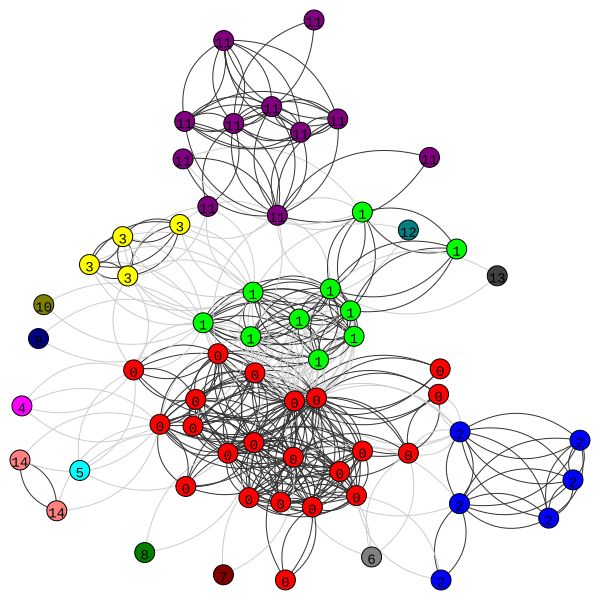

In [35]:
dendrogram = g.community_edge_betweenness(clusters=None)
partition_edge_betw = dendrogram.as_clustering()
g.vs['label'] = partition_edge_betw.membership

membership_betweenness = partition_edge_betw.membership
g.vs["cluster"] = membership_betweenness
palette = ClusterColoringPalette(len(partition_edge_betw))

ig.plot(partition_edge_betw)

In [16]:
# size of communities
partition_edge_betw.modularity

0.39551897576588924

Now let's see the most influential people in the subgroups, what could this mean? The people in the subgroups who make decisions or the people who think of a plan.

In [18]:
#@title
graphs = partition_optimal.subgraphs()
community_most_cited = list()

for graph in graphs:
  graph.vs["centrality"] = graph.degree(graph.vs, mode="all")
  most_central = graph.vs[graph.vs["centrality"].index(max(graph.vs["centrality"]))]
  print(most_central["name"], '. with Degree Centrality  =', most_central["centrality"])
  community_most_cited.append(most_central["label"])

"Imad Eddin Barakat" . with Degree Centrality  = 32
"Galeb Kalaje" . with Degree Centrality  = 28
"S B Abdelmajid Fakhet" . with Degree Centrality  = 6
"Abderrahim Zbakh" . with Degree Centrality  = 12
"Mohamad Bard Ddin Akkab" . with Degree Centrality  = 14


In [30]:
v_target_1 = g.vs.find(name = '"Imad Eddin Barakat"')
v_target_2 = g.vs.find(name = '"Galeb Kalaje"')
v_target_3 = g.vs.find(name = '"S B Abdelmajid Fakhet"')
v_target_4 = g.vs.find(name = '"Abderrahim Zbakh"')
v_target_5 = g.vs.find(name = '"Mohamad Bard Ddin Akkab"')


🧭 Cammini minimi evidenziati da "Imad Eddin Barakat"


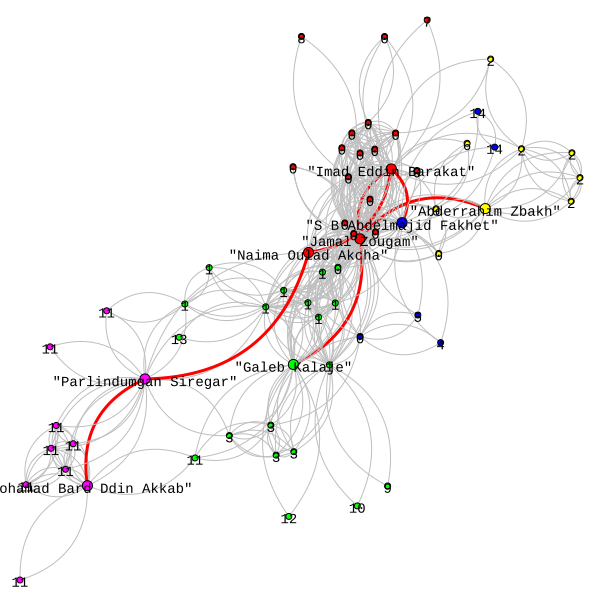

In [34]:
# Source node
v_source = g.vs.find(name = '"Imad Eddin Barakat"')

# List of the target
target_names = [
    '"Galeb Kalaje"',
    '"S B Abdelmajid Fakhet"',
    '"Abderrahim Zbakh"',
    '"Mohamad Bard Ddin Akkab"'
]

# Set for taking nodes and edges of the path
special_nodes = set()
special_edges = set()


# Build the paths
for name in target_names:
    try:
        v_target = g.vs.find(name=name)
        vertex_path = g.get_shortest_paths(v=v_source, to=v_target, output='vpath')[0]
        edge_path = g.get_shortest_paths(v=v_source, to=v_target, output='epath')[0]

        special_nodes.update(vertex_path)
        special_edges.update(edge_path)

    except ValueError:
        print(f"⚠️ Nodo '{name}' non trovato nel grafo.")

# Combined visualization
visual_style = {
    "vertex_color": [palette[membership[i]] for i in range(len(g.vs))],
    "vertex_border_color": ["red" if i in special_nodes else "black" for i in range(len(g.vs))],
    "vertex_label": [g.vs[i]["name"] if i in special_nodes else "" for i in range(len(g.vs))],
    "vertex_size": [10 if i in special_nodes else 6 for i in range(len(g.vs))],
    "edge_color": ["red" if i in special_edges else "grey" for i in range(len(g.es))],
    "edge_width": [3 if i in special_edges else 1 for i in range(len(g.es))],
    "layout": g.layout("fr")  # oppure "graphopt", "kk", ecc.
}

print("🧭 Cammini minimi evidenziati da", v_source["name"])
ig.plot(g, **visual_style)


Make the same thing but with bewtweenness


🧭 Cammini minimi evidenziati da "Imad Eddin Barakat"


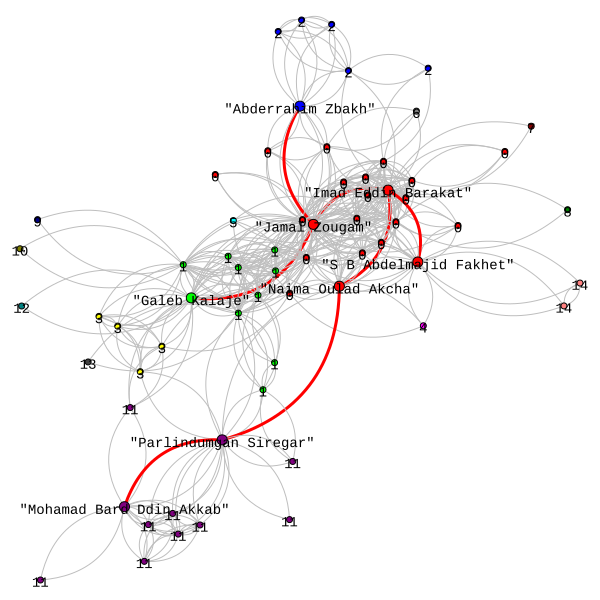

In [36]:
v_source = g.vs.find(name = '"Imad Eddin Barakat"')

target_names = [
    '"Galeb Kalaje"',
    '"S B Abdelmajid Fakhet"',
    '"Abderrahim Zbakh"',
    '"Mohamad Bard Ddin Akkab"'
]

special_nodes = set()
special_edges = set()


for name in target_names:
    try:
        v_target = g.vs.find(name=name)
        vertex_path = g.get_shortest_paths(v=v_source, to=v_target, output='vpath')[0]
        edge_path = g.get_shortest_paths(v=v_source, to=v_target, output='epath')[0]

        special_nodes.update(vertex_path)
        special_edges.update(edge_path)

    except ValueError:
        print(f"⚠️ Nodo '{name}' not found in the graph.")

visual_style = {
    "vertex_color": [palette[membership_betweenness[i]] for i in range(len(g.vs))],
    "vertex_border_color": ["red" if i in special_nodes else "black" for i in range(len(g.vs))],
    "vertex_label": [g.vs[i]["name"] if i in special_nodes else "" for i in range(len(g.vs))],
    "vertex_size": [10 if i in special_nodes else 6 for i in range(len(g.vs))],
    "edge_color": ["red" if i in special_edges else "grey" for i in range(len(g.es))],
    "edge_width": [3 if i in special_edges else 1 for i in range(len(g.es))],
    "layout": g.layout("fr")  # oppure "graphopt", "kk", ecc.
}

print("🧭 Mininum path ", v_source["name"])
ig.plot(g, **visual_style)


As we can see from the two graphs, the important nodes in both networks belong to distinct subgroups. Therefore, we will use optimal clustering.

Now let's show the assortativity and disassortativity in the groups to understand the properties of the latter.

-0.40321754278102373


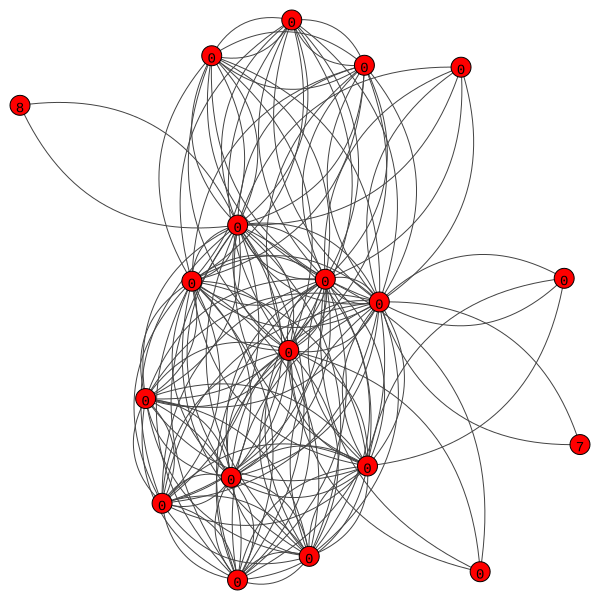

In [39]:
print(partition_optimal.subgraphs()[0].assortativity_degree())
ig.plot(partition_optimal.subgraphs()[0],vertex_color = 'red')

-0.18686616791354965


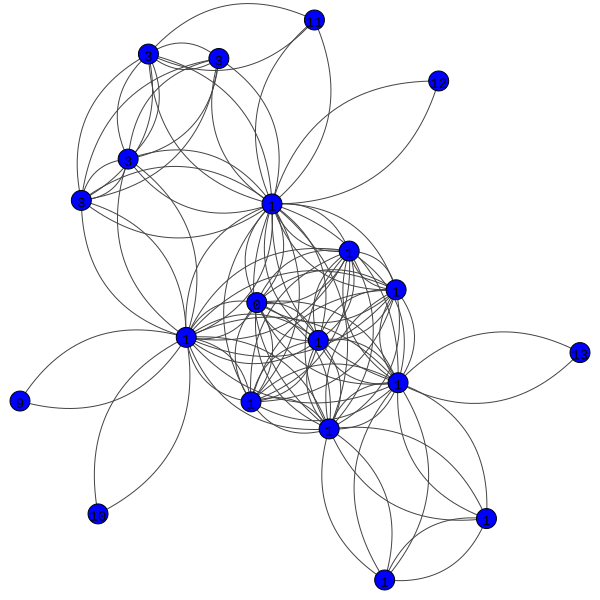

In [40]:
print(partition_optimal.subgraphs()[1].assortativity_degree())
ig.plot(partition_optimal.subgraphs()[1],vertex_color = 'blue')

-0.09090909090908747


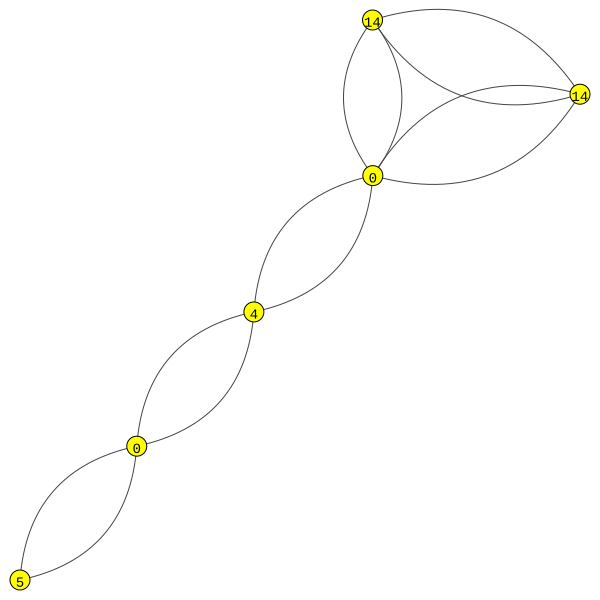

In [41]:
print(partition_optimal.subgraphs()[2].assortativity_degree())
ig.plot(partition_optimal.subgraphs()[2],vertex_color = 'yellow')

-0.07888631090487369


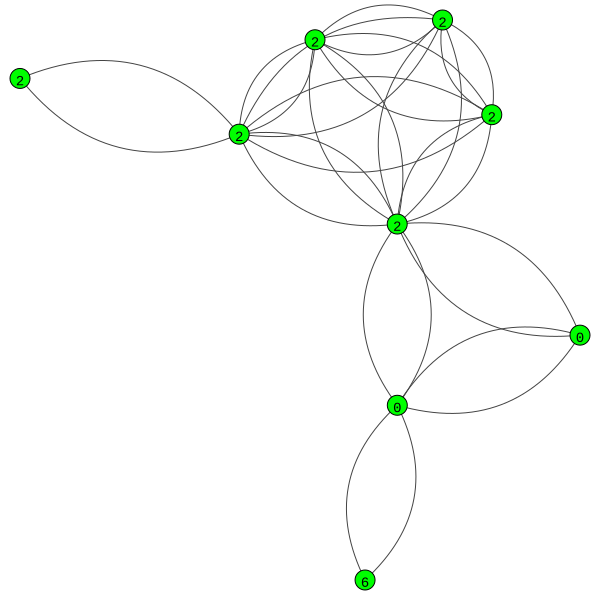

In [43]:
print(partition_optimal.subgraphs()[3].assortativity_degree())
ig.plot(partition_optimal.subgraphs()[3],vertex_color = 'green')

-0.33022388059702007


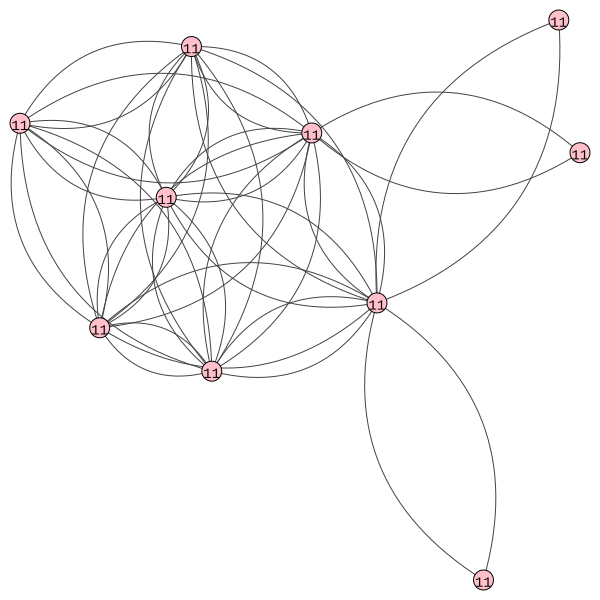

In [44]:
print(partition_optimal.subgraphs()[4].assortativity_degree())
ig.plot(partition_optimal.subgraphs()[4],vertex_color = 'pink')

As we show, the main groups appear to be disassortative, while the overall network structure is instead neutral. This likely means that leaders give orders to subordinates but do not interact frequently with each other, remaining almost independent. However, when looking at the bigger picture, these leaders may eventually connect with one another during the planning or coordination phase, which would lead to an increase in assortativity at the global level.

Within each cluster:
*   Compute betweenness centrality → to identify the bridge nodes connecting different communities
*   Compute eigenvector centrality → to identify internal leaders

Remove nodes in sequence:
1.   First, remove the bridges between groups (i.e., nodes with high global betweenness)
2.   Then, remove the local leaders (nodes with high eigenvector centrality)

Monitor whether the size of the largest connected component collapses → an indication that the network has been effectively fragmented

In [45]:
g.vs["betweenness"] = g.betweenness()
top_betweenness = sorted(zip(g.vs["name"], g.vs["betweenness"]), key=lambda x: x[1], reverse=True)[:10]
for name, score in top_betweenness:
    print(f"{name}: Betweenness = {score}")

"Parlindumgan Siregar": Betweenness = 448.5200997700997
"Jamal Zougam": Betweenness = 392.35217187717177
"Mohamed Chaoui": Betweenness = 320.8381858631858
"Naima Oulad Akcha": Betweenness = 268.98478998479
"Imad Eddin Barakat": Betweenness = 267.66587611587596
"Khalid Ouled Akcha": Betweenness = 246.39207524207518
"Galeb Kalaje": Betweenness = 232.25020770020777
"Alí Amrous": Betweenness = 175.81865079365082
"S B Abdelmajid Fakhet": Betweenness = 164.2050782550782
"Abderrahim Zbakh": Betweenness = 147.28308913308913


In [47]:
g.vs["eigenvector"] = g.eigenvector_centrality()
for c in range(len(partition_optimal)):
    cluster_nodes = [v for v in g.vs if v["cluster"] == c]
    top_leader = max(cluster_nodes, key=lambda v: v["eigenvector"])
    print(f"Cluster {c}: Leader = {top_leader['name']}, Eigenvector = {top_leader['eigenvector']}")


Cluster 0: Leader = "Jamal Zougam", Eigenvector = 1.0
Cluster 1: Leader = "José Emilio Suárez", Eigenvector = 0.546759511396447
Cluster 2: Leader = "Abderrahim Zbakh", Eigenvector = 0.186809339512292
Cluster 3: Leader = "Abdeluahid Berrak", Eigenvector = 0.08584787790940028
Cluster 4: Leader = "Said Ahmidan", Eigenvector = 0.05032043062668443


In [48]:
# Prendi i primi 5 per betweenness
remove_candidates = [v.index for v in sorted(g.vs, key=lambda v: v["betweenness"], reverse=True)[:5]]

# Aggiungi i leader di ogni cluster (evita duplicati)
for c in range(len(partition_optimal)):
    cluster_nodes = [v for v in g.vs if v["cluster"] == c]
    leader = max(cluster_nodes, key=lambda v: v["eigenvector"])
    if leader.index not in remove_candidates:
        remove_candidates.append(leader.index)


Dimensione del componente principale dopo ogni rimozione:
[62, 61, 60, 59, 58, 57, 55, 48, 47]


<ipython-input-56-14fdf4945642>:8: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  components = g_copy.clusters()


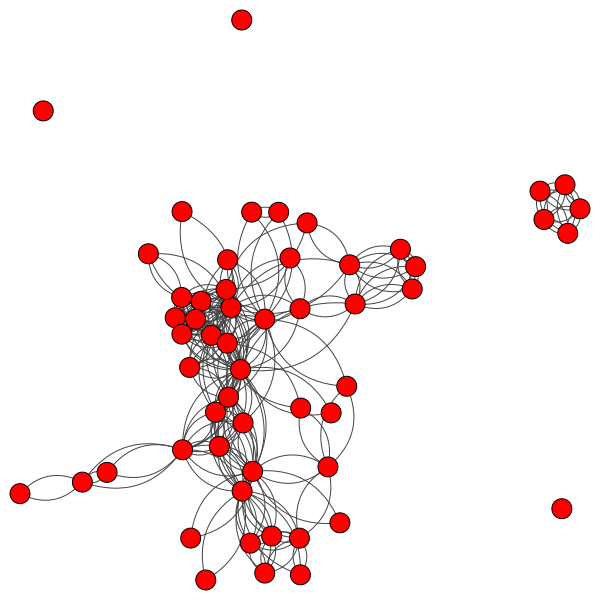

In [56]:
import copy
g_copy = copy.deepcopy(g)

component_sizes = []

for idx in remove_candidates:
    g_copy.delete_vertices(idx)
    components = g_copy.clusters()
    largest = max(components.sizes())
    component_sizes.append(largest)

print("Dimensione del componente principale dopo ogni rimozione:")
print(component_sizes)
ig.plot(g_copy)

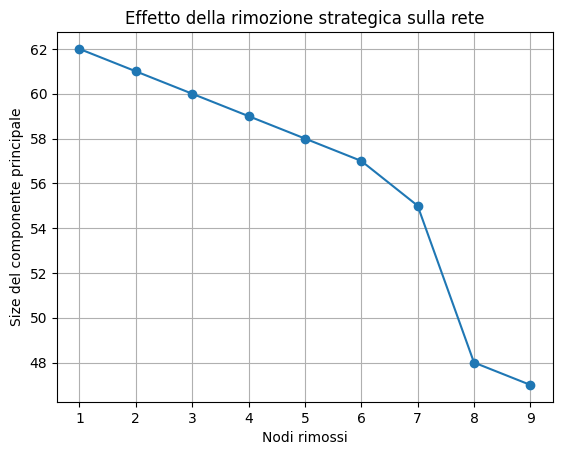

In [50]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(component_sizes)+1), component_sizes, marker='o')
plt.xlabel("Nodi rimossi")
plt.ylabel("Size del componente principale")
plt.title("Effetto della rimozione strategica sulla rete")
plt.grid(True)
plt.show()


The previously shown red cluster is particularly difficult to dismantle due to the high number of internal connections. However, as we can see with this procedure, we were able to isolate several subgroups and, most importantly, remove the most critical and potentially dangerous individuals.